#  Business Problem:  Customer Churn Prediction

 - Acquiring new customers is important, but retaining them accelerates profitable growth.

 - While churn prediction offers the knowledge of which customers are going to stop doing business with your brand at present and the reasons behind them leaving, churn forecasting depicts the total number of customers who are most likely to leave in the near future.

![Business Quetions](pics/churn.png)

##  Project Tasks
A business manager of a consumer credit card portfolio is facing the problem of customer attrition, also known as customer churn. While acquiring new customers is important, simultaneously retaining customers is key to driving profitable growth for the company. In order to prevent the further loss of customers in the future, the manager asks our data analysis team to complete these 3 tasks:
- Analyze the data to find out the potential signals for customers leaving
- Predict which customers are likely to leave in the near future
- Provide data-driven solutions to prevent future customer churn

The manager hopes to leverage this information to retain loyal customers, focus and target marketing campaigns towards customers likely to leave, boost profits, and minimize loss.

 **Customer churn prediction has several benefits, such as:**

- Retain the loyalty of customers: By knowing which customers are most likely to leave, companies can create customized marketing strategies for individual customers, thereby retaining their loyalty. 
- Get the business back on track: By identifying the root causes of customer churn, brands can rethink and rebuild their product/service, marketing, and acquisition strategies.
- Boost profits: Acquiring new customers is usually very expensive. However, by selling to existing customers, you can boost profits significantly.
- Avert Loss: Customer churn leads to substantial losses. Hence, churn prediction allows businesses to avoid losses by retaining more existing customers through innovative business strategies.


## Summary of Data and Modeling
- Credit card data: 10127 obs. of  21 variables (Kaggle)
- Review data: 7513 obs. of  9 variables
- Visualization: histogram, scatterplot, barplot ... 
- Supervised Method - Classification Model: Decision TREE, Logistic Regression, Random Forest,XGBoost to classify if a customer is going to drop off.
- Unsupervised Method - Clustering Model: Kmeans model to segment attrited customers to get to know more about the pattern in each customer segmentation. 
- Text Mining for Credit Card customer reviews 
- Improvement: Handling imbalanced data. (ROSE), Deep learning models

In [723]:
# Read data
bank <- read.csv("data/bank_clean.csv", stringsAsFactors = TRUE)
head(bank)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,⋯,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
2,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,⋯,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
3,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,⋯,1,0,3418,0,3418,2.594,1887,20,2.333,0.000
4,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,⋯,4,1,3313,2517,796,1.405,1171,20,2.333,0.760
5,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,⋯,1,0,4716,0,4716,2.175,816,28,2.500,0.000
6,713061558,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,⋯,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311


In [724]:
summary(bank)

   CLIENTNUM         Attrition_Flag    Customer_Age   Gender   Dependent_count
 Min.   :708082083   Min.   :0.0000   Min.   :26.00   F:5358   Min.   :0.000  
 1st Qu.:713036770   1st Qu.:0.0000   1st Qu.:41.00   M:4769   1st Qu.:1.000  
 Median :717926358   Median :0.0000   Median :46.00            Median :2.000  
 Mean   :739177606   Mean   :0.1607   Mean   :46.33            Mean   :2.346  
 3rd Qu.:773143533   3rd Qu.:0.0000   3rd Qu.:52.00            3rd Qu.:3.000  
 Max.   :828343083   Max.   :1.0000   Max.   :73.00            Max.   :5.000  
                                                                              
      Education_Level  Marital_Status       Income_Category  Card_Category 
 College      :1013   Divorced: 748   $120K +       : 727   Blue    :9436  
 Doctorate    : 451   Married :4687   $40K - $60K   :1790   Gold    : 116  
 Graduate     :3128   Single  :3943   $60K - $80K   :1402   Platinum:  20  
 High School  :2013   Unknown : 749   $80K - $120K  :1535   Silv

In [725]:
str(bank)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status          : Factor w/ 4 levels "Divorced","Married",..: 2 3 2 4 2 2 2 4 3 3 ...
 $ Income_Category         : Factor w/ 6 levels "$120K +","$40K - $60K",..: 3 5 4 5 3 2 1 3 3 4 ...
 $ Card_Category           : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Months_Inactive_12_mon  : int  1 1 1 4 1

## Data Validation:
- **CLIENTNUM**: Unique identifier for the customer holding the account, int, such as "768805383"
- **Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then 1 else 0: Exisiting customer 84%, Attrited customer 16%.
- **Customer_Age**: Demographic variable - Customer's Age in Years, int, 26--73
- **Gender**: Demographic variable - M=Male, F=Female, F 53%, M =47%
- **Dependent_count**:Demographic variable - Number of dependents, int, 0-5
- **Education_Level**: Demographic variable - Educational Qualification of the account holder, chr, "high school" 20%,  "graduate" 31%, ... 7 levels,
-  **Marital_Status**: Demographic variable, chr, "Married", "Single", "Divorced", "Unknown", 4 levels
- **Income_Category**: Demographic variable - Annual Income Category of the account holder, chr, (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown) 6 levels, 
- **Card_Category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum) 4 levels, Blue 93%
- **Months_on_book**: Period of relationship with bank, int 13 - 56 months.
- **Total_Relationship_Count**: Total no. of products held by the customer, int 1-6
- **Months_Inactive_12_mon**: No. of months inactive in the last 12 months, int, 0-6
- **Contacts_Count_12_mon**: No. of Contacts in the last 12 months, int, 0-6
- **Credit_Limit**: Credit Limit on the Credit Card, num, 1.44K-34.5K
- **Total_Revolving_Bal****:Total Revolving Balance on the Credit Card,int, 0 - 2517 # the meaning
- **Avg_Open_To_Buy**:Open to Buy Credit Line (Average of last 12 months), num, 3 - 34.5k
- **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1),num, 0-3.4
- **Total_Trans_Amt**: Total Transaction Amount (Last 12 months), int,510-18.5k
- **Total_Trans_Ct**: Total Transaction Count (Last 12 months), int, 10 - 139
- **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1), num, 0 - 3.71
- **Avg_Utilization_Ratio**, Average Card Utilization Ratio, num 0 - 100%



## Data Visualiaztion and Exploratory Analysis

In [726]:
# Target Variable: Attition_Flag
library(ggplot2)
mean(bank$Attrition_Flag == 1)

[1] 0.1606596

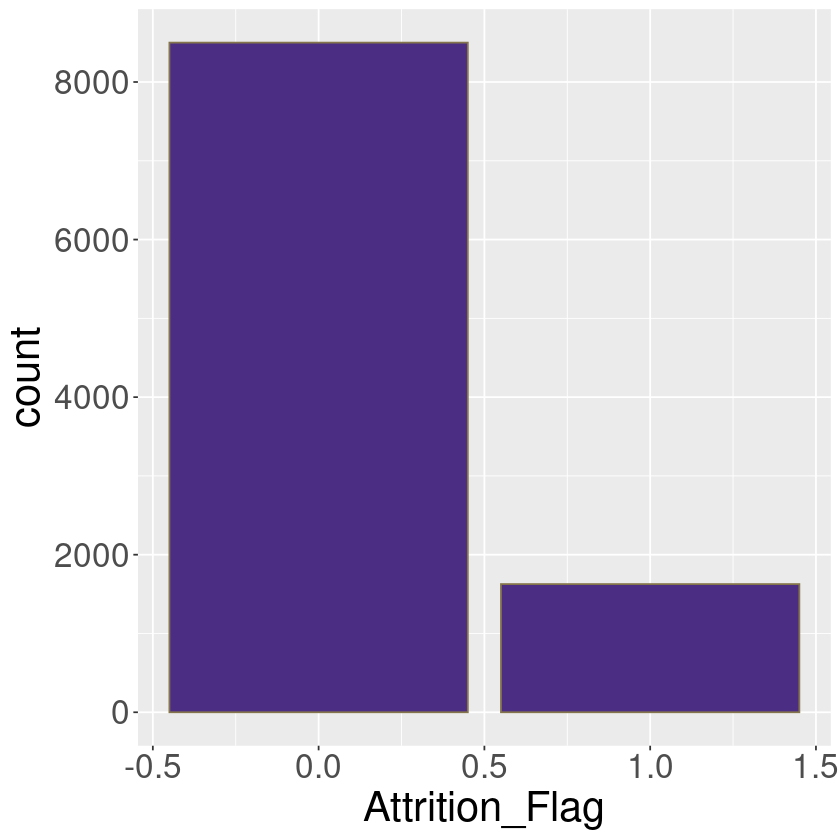

In [727]:
attrition_gg <- ggplot(data = bank) + geom_bar(aes(x=Attrition_Flag), fill = "#4b2e83", color = "#85754d")
attrition_gg + theme(text = element_text(size = 25))


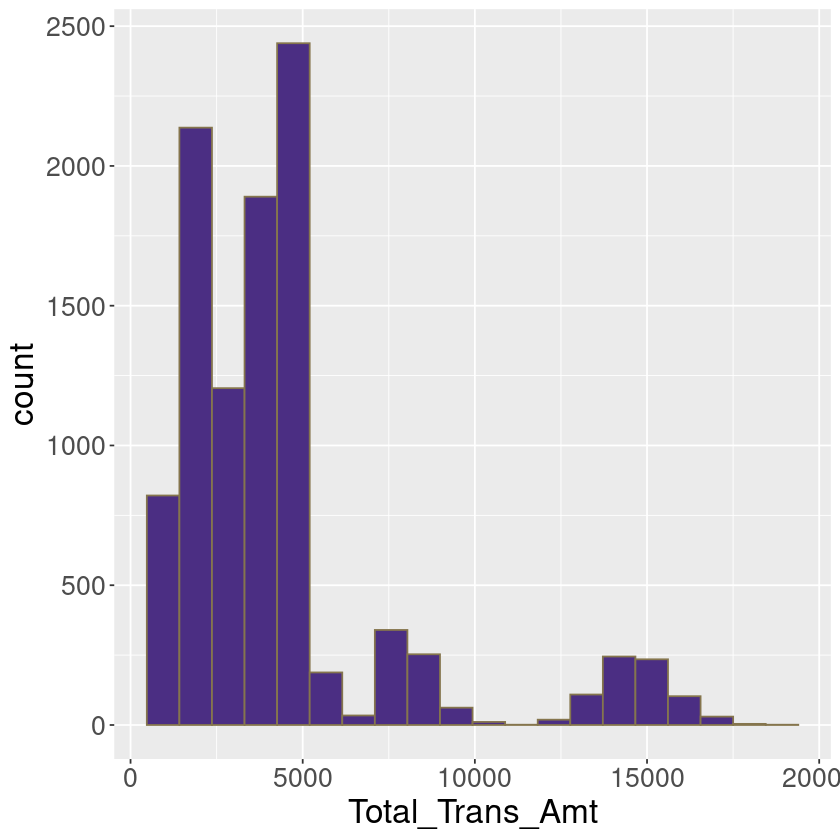

In [728]:
Trans_Amt_gg <- ggplot(data = bank) + geom_histogram(aes(x=Total_Trans_Amt), fill = "#4b2e83", color = "#85754d", bins = 20)
Trans_Amt_gg + theme(text = element_text(size = 20))

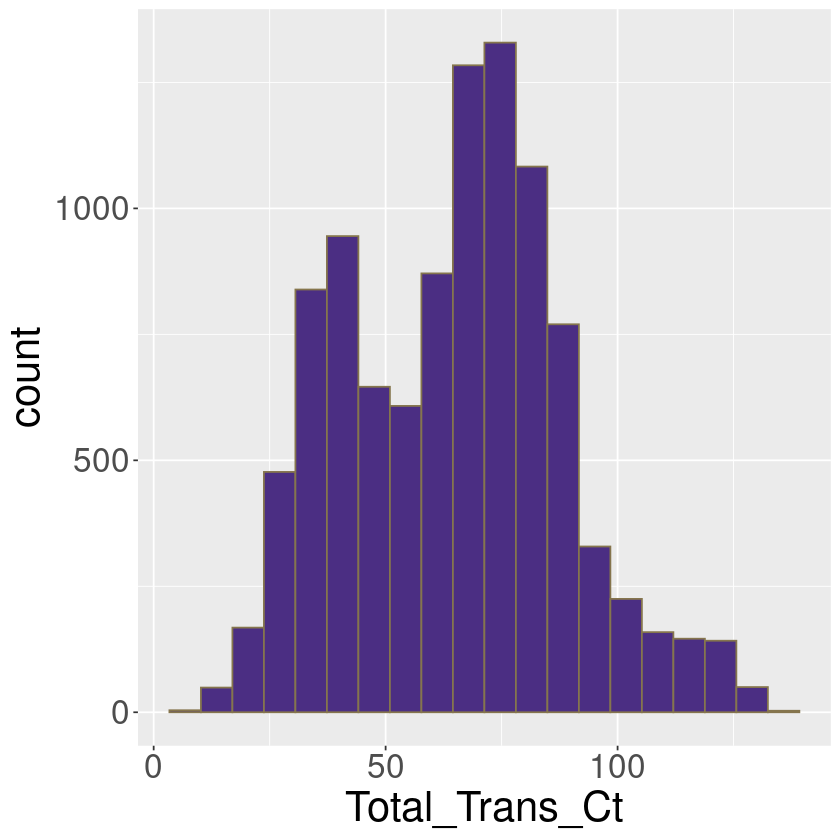

In [729]:
Trans_Ct_gg <- ggplot(data = bank) + geom_histogram(aes(x=Total_Trans_Ct), fill = "#4b2e83", color = "#85754d", bins = 20)
Trans_Ct_gg + theme(text = element_text(size = 25))

### Inspecting the relationships between target variable and categorical variables 
- Gender
- Education_Level 
- Marital_Status 
- Income_Category
- Card_Category 

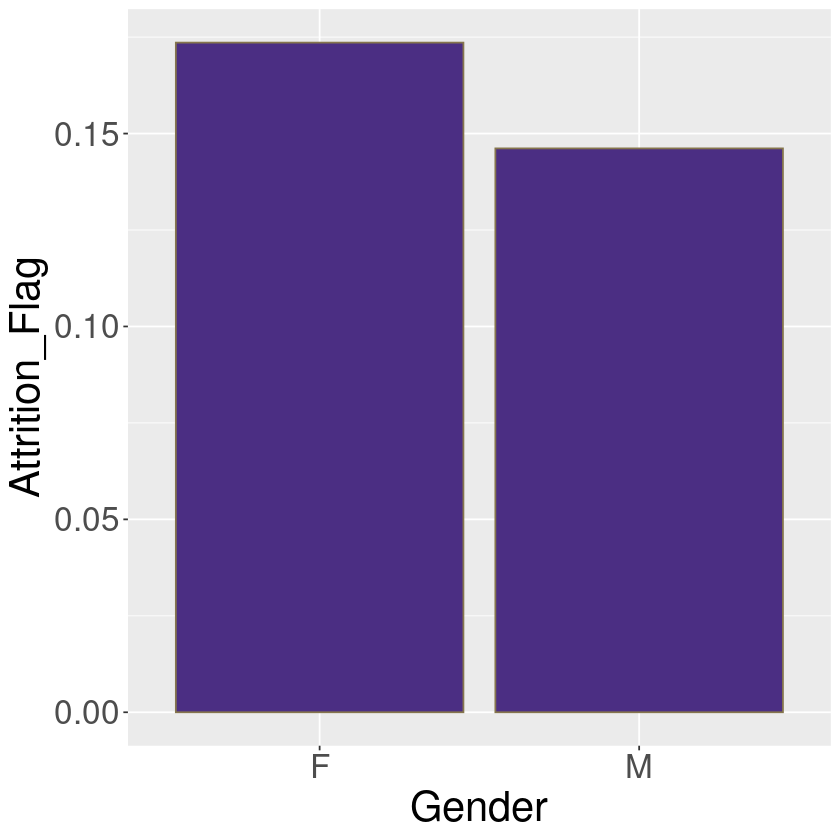

In [730]:
gender_gg <- ggplot(data = bank) + geom_bar(aes(x = Gender, y = Attrition_Flag),  fill = "#4b2e83", color = "#85754d",stat = "summary", fun = "mean") 
gender_gg + theme(text = element_text(size = 25))

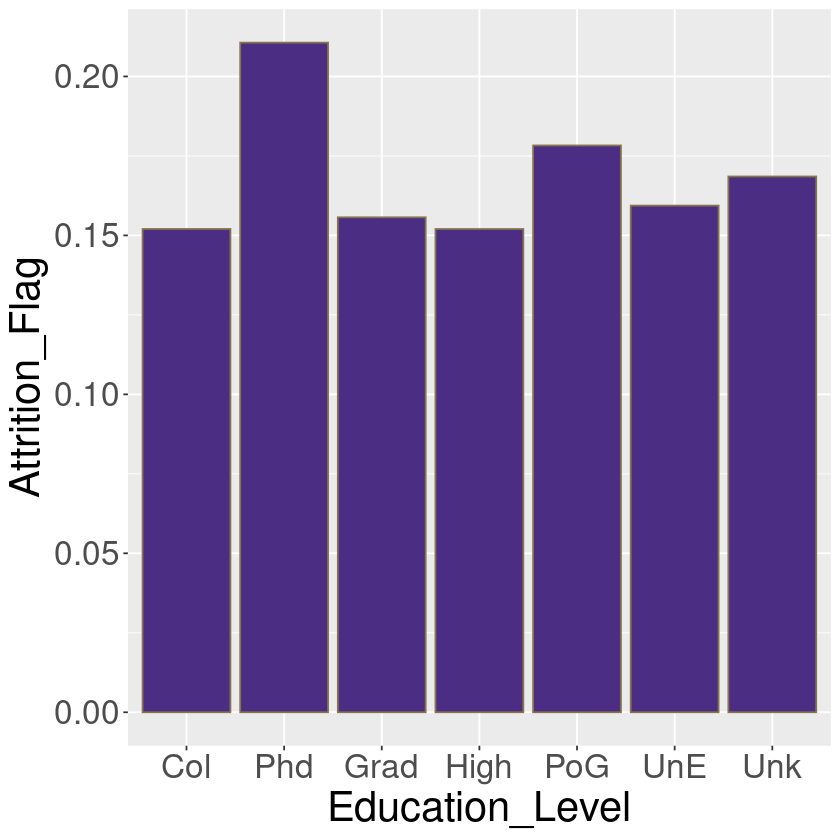

In [731]:

levels(bank$Education_Level) <- c('Col','Phd','Grad','High','PoG','UnE','Unk') 

edu_gg <- ggplot(data = bank) + geom_bar(aes(x = Education_Level, y = Attrition_Flag), fill = "#4b2e83", color = "#85754d",stat = "summary", fun = "mean") 
edu_gg + theme(text = element_text(size = 25))

levels(bank$Education_Level) <- c('College','Doctorate','Graduate','High School','Post-Graduate','Uneducated','Unknown')


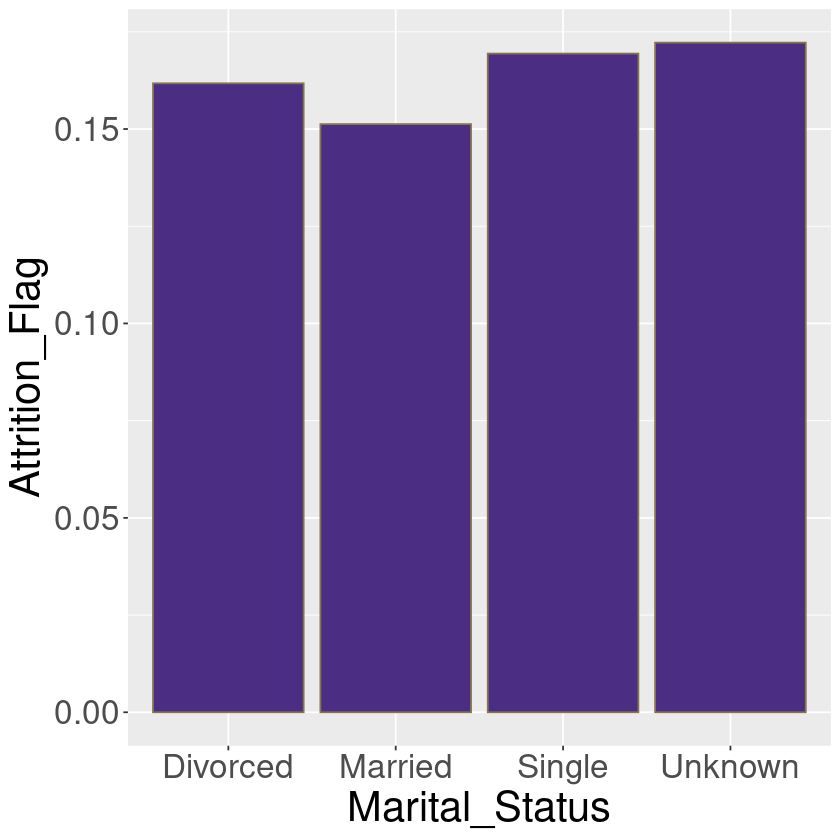

In [732]:

mar_gg <- ggplot(data = bank) + geom_bar(aes(x = Marital_Status, y = Attrition_Flag), fill = "#4b2e83", color = "#85754d", stat = "summary", fun = "mean")
mar_gg + theme(text = element_text(size = 25))


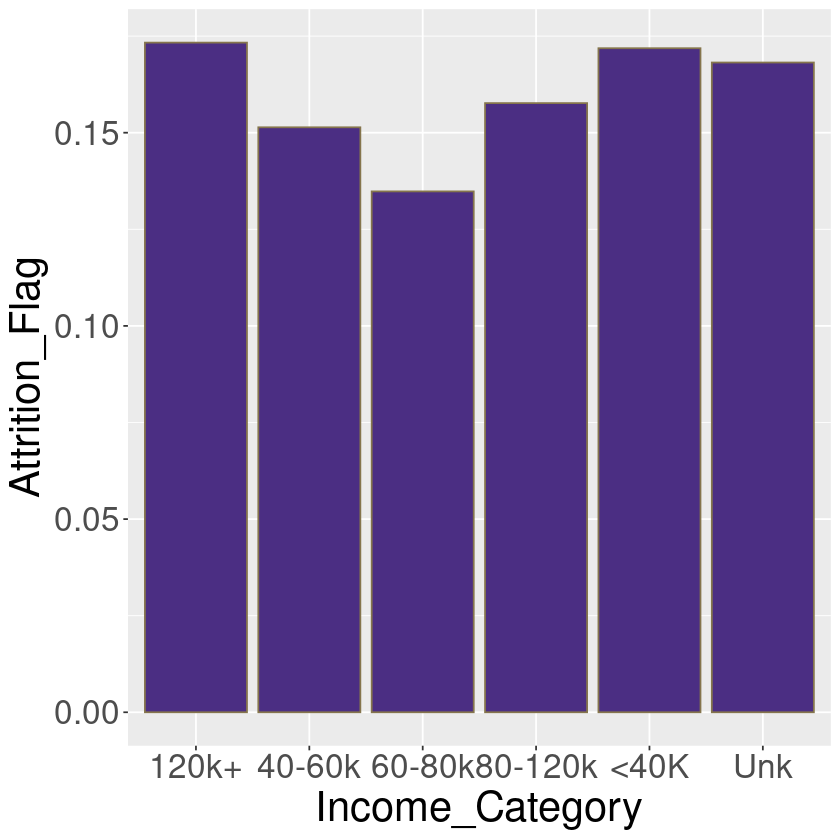

In [733]:
# rename to show the income more clearly 
levels(bank$Income_Category) <- c('120k+','40-60k','60-80k','80-120k', '<40K','Unk') 

income_gg <- ggplot(data = bank) + geom_bar(aes(x = Income_Category, y = Attrition_Flag),fill = "#4b2e83", color = "#85754d", stat = "summary", fun = "mean")
income_gg + theme(text = element_text(size = 25))

#levels(bank$Income_Category)

levels(bank$Income_Category) <- c('$120K +','$40K - $60K','$60K - $80K','$80K - $120K','Less than $40K','Unknown')




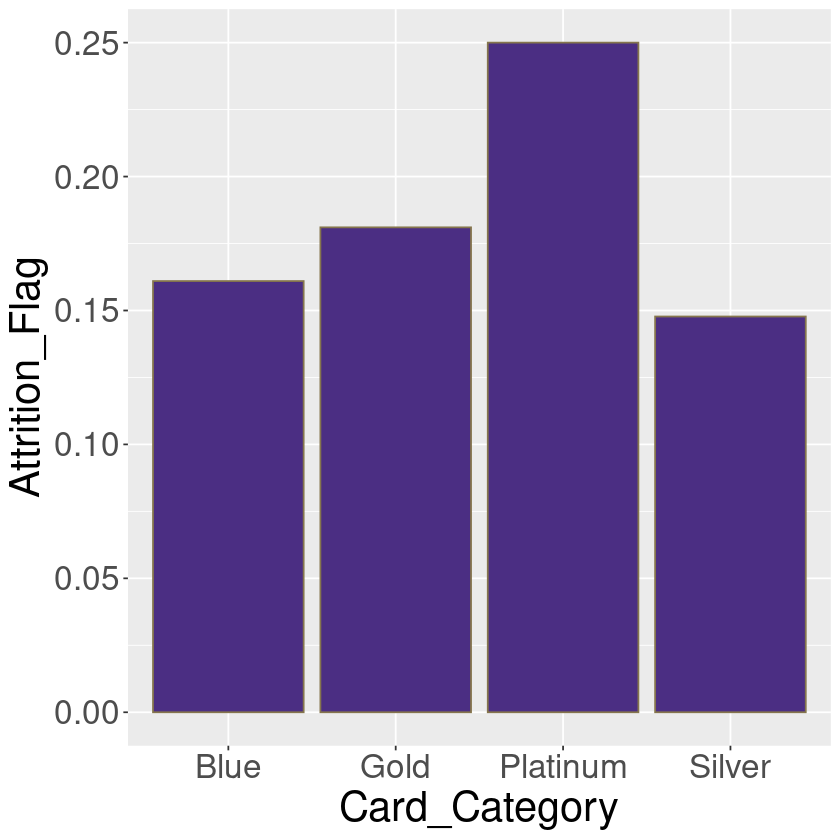

In [734]:
card_gg <- ggplot(data = bank) + geom_bar(aes(x = Card_Category, y = Attrition_Flag), fill = "#4b2e83", color = "#85754d", stat = "summary", fun = "mean")
card_gg + theme(text = element_text(size = 25))


### Inspecting the Relationships between Target Variable and Numerical Variables
- Customer_Age
- Dependent_count
- Months_on_book 
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit
- Total_Revolving_Bal
- Avg_Open_To_Buy
- Total_Amt_Chng_Q4_Q1
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Avg_Utilization_Ratio

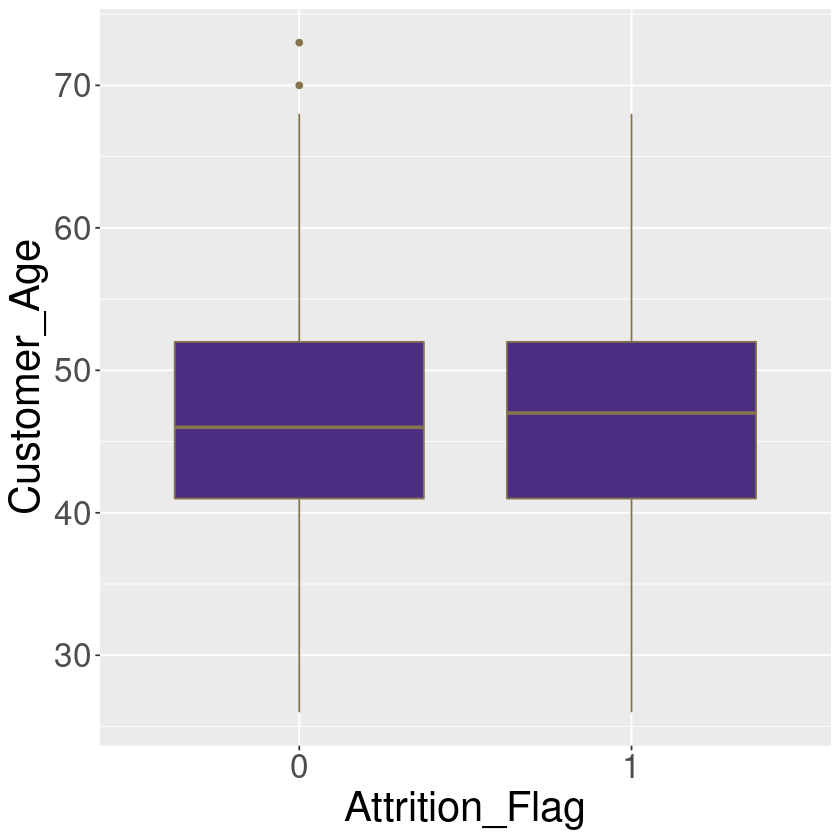

In [735]:
bank$Attrition_Flag <- factor(bank$Attrition_Flag)
gender_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y = Customer_Age ),fill = "#4b2e83", color = "#85754d")
gender_gg + theme(text = element_text(size = 25))

# higher age, higher attrtion

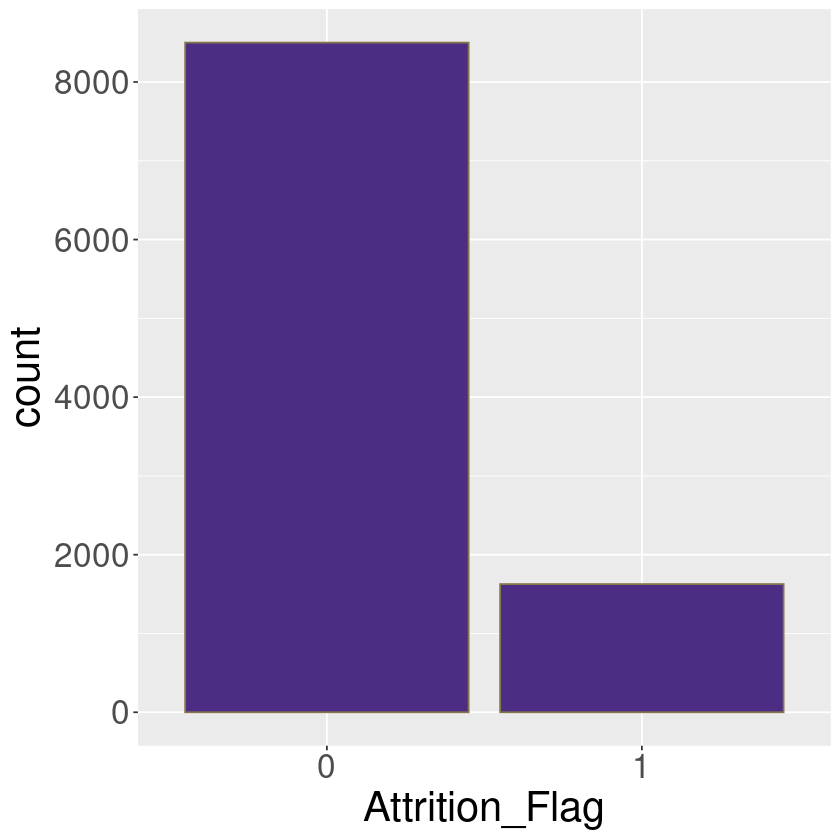

In [736]:
# Improve the visualization: as.factor for Attrition_Flag
attrition_gg <- ggplot(data = bank) + geom_bar(aes(x=Attrition_Flag), fill = "#4b2e83", color = "#85754d")
attrition_gg + theme(text = element_text(size = 25))

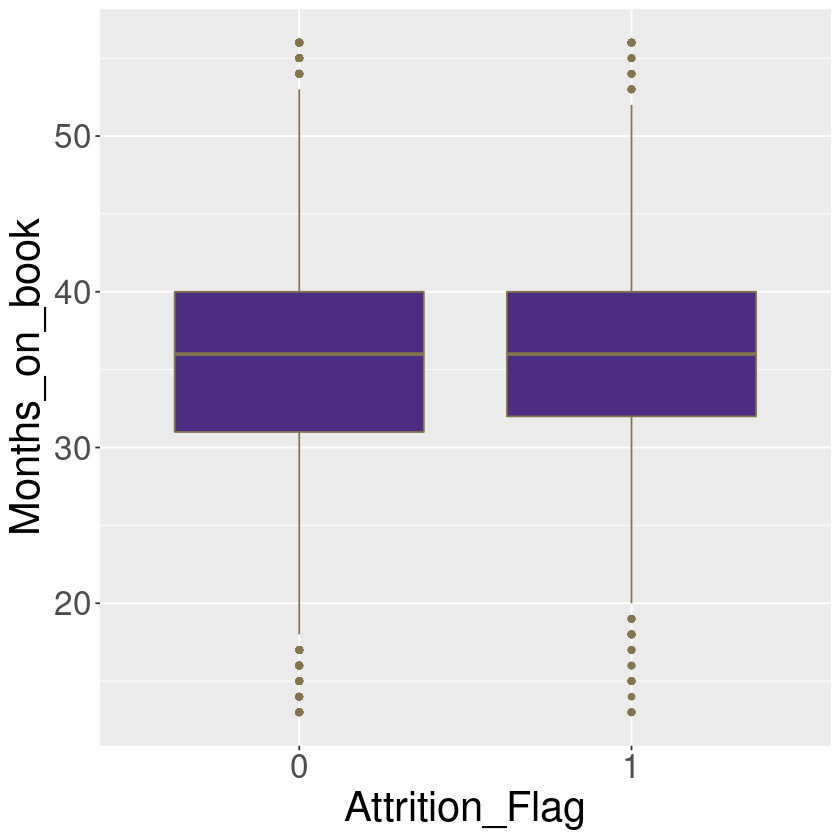

In [737]:

month_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Months_on_book), fill = "#4b2e83", color = "#85754d")
month_gg + theme(text = element_text(size = 25)) 

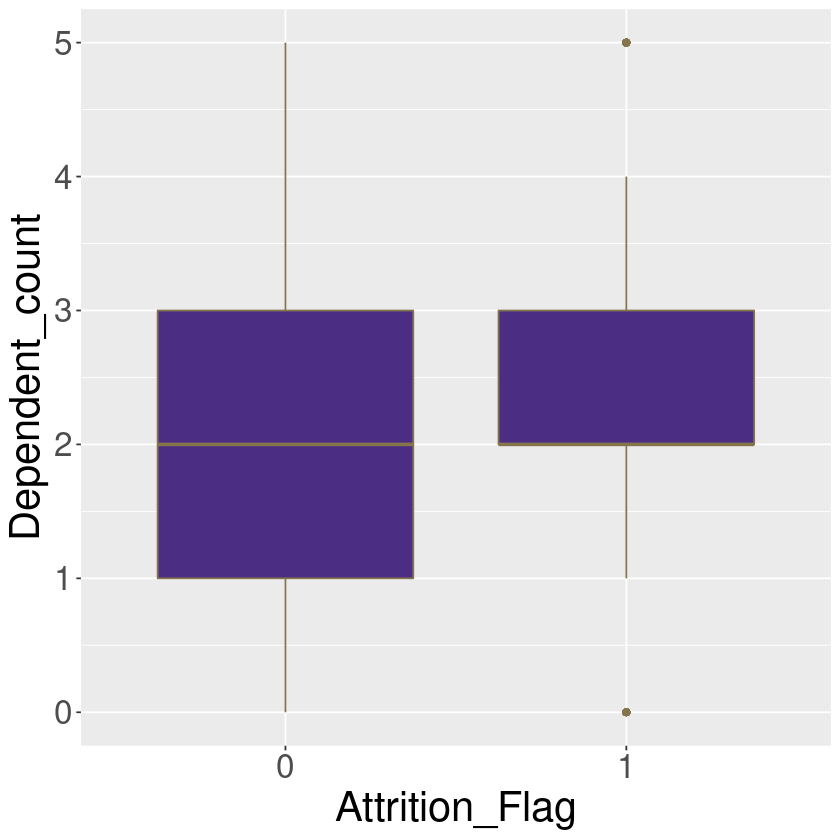

In [738]:
de_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y = Dependent_count), fill = "#4b2e83", color = "#85754d")

de_gg + theme(text = element_text(size = 25))

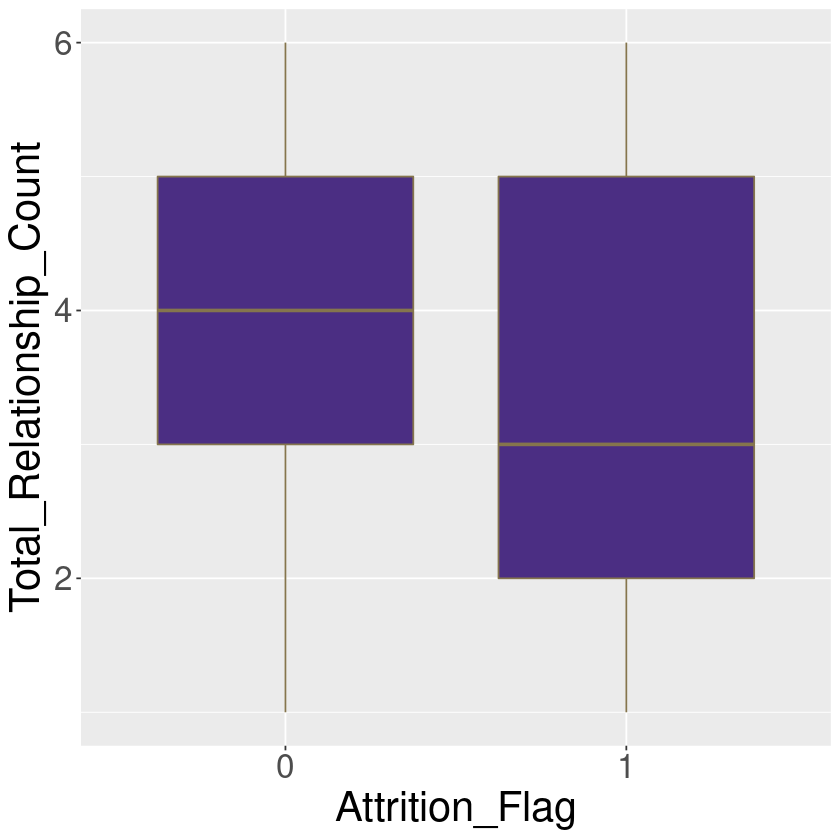

In [739]:
relation_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Total_Relationship_Count), fill = "#4b2e83", color = "#85754d")

relation_gg + theme(text = element_text(size = 25)) 

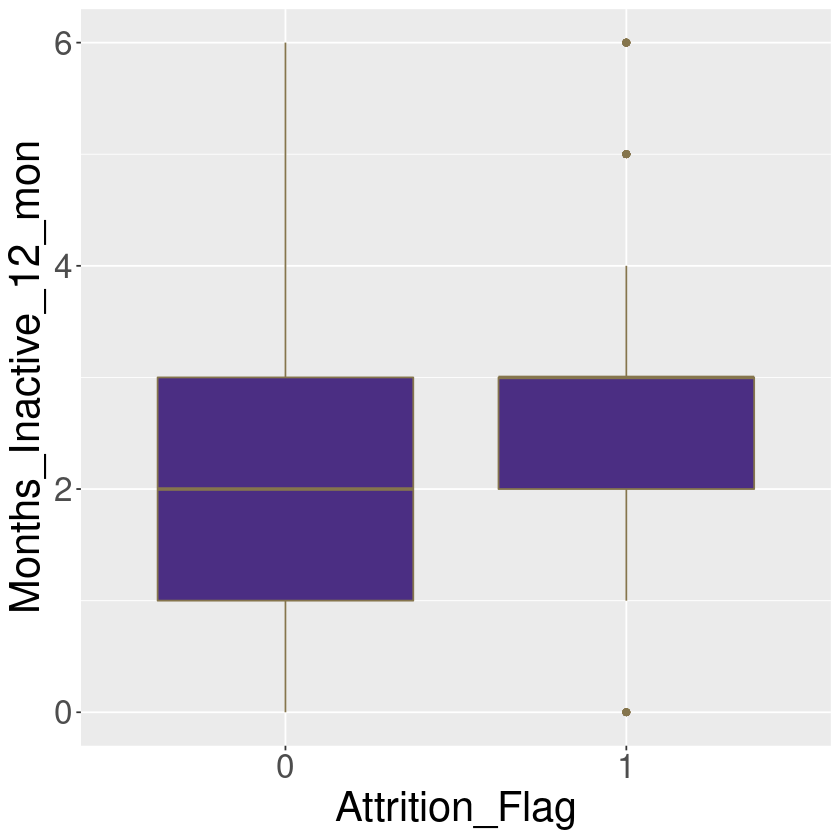

In [740]:
inative_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Months_Inactive_12_mon), fill = "#4b2e83", color = "#85754d")

inative_gg + theme(text = element_text(size = 25)) 

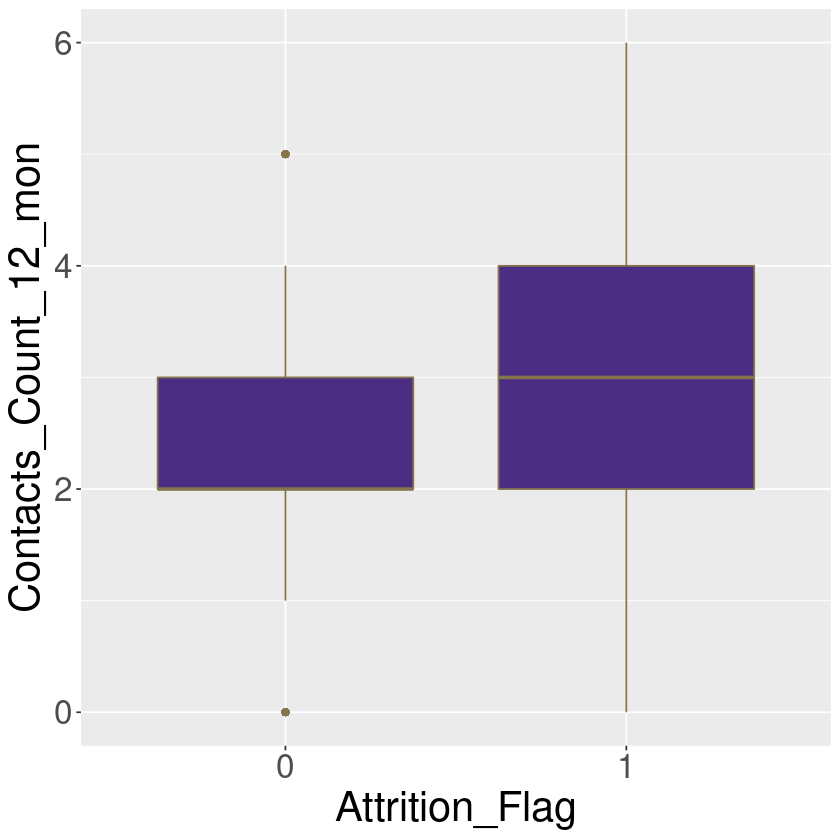

In [741]:
contact_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Contacts_Count_12_mon), fill = "#4b2e83", color = "#85754d")

contact_gg + theme(text = element_text(size = 25)) 

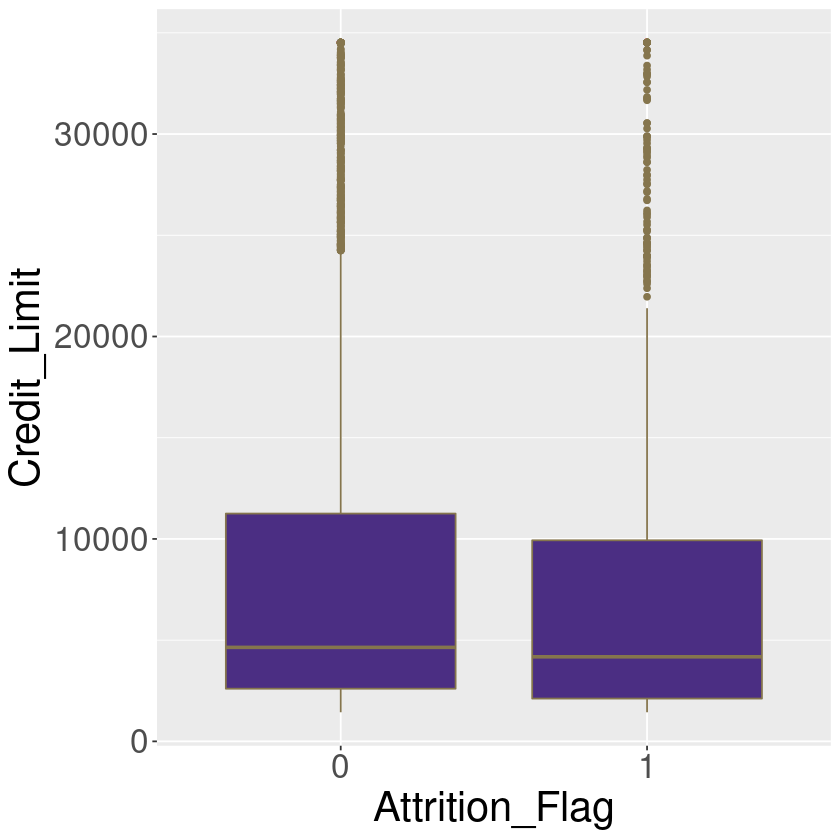

In [742]:
credit_gg<- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Credit_Limit), fill = "#4b2e83", color = "#85754d")

credit_gg + theme(text = element_text(size = 25)) 

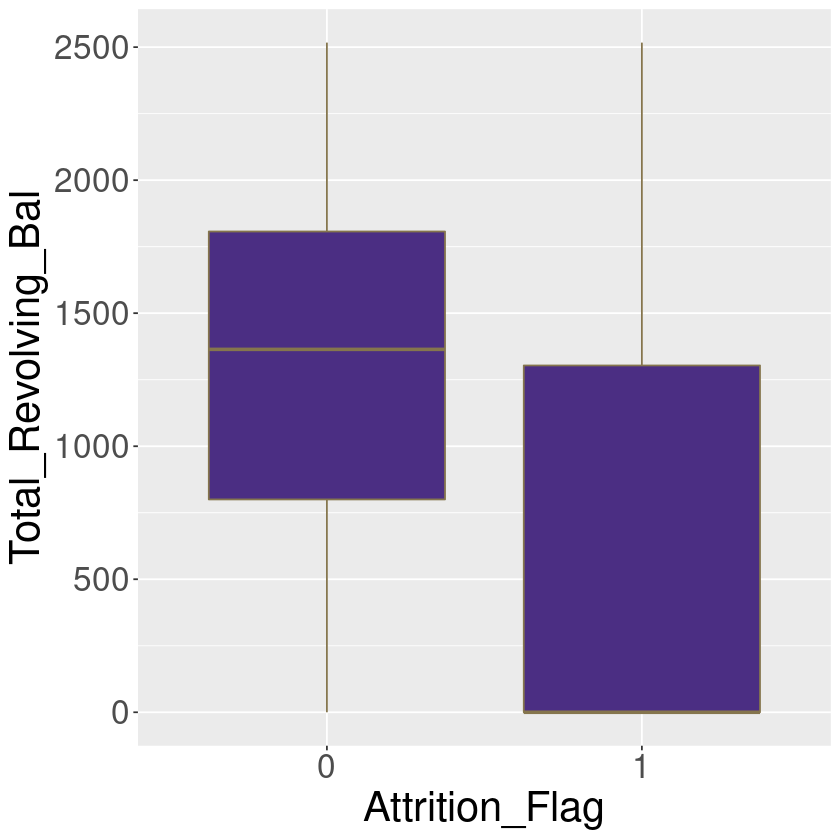

In [743]:
rev_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Total_Revolving_Bal), fill = "#4b2e83", color = "#85754d")

rev_gg + theme(text = element_text(size = 25)) 

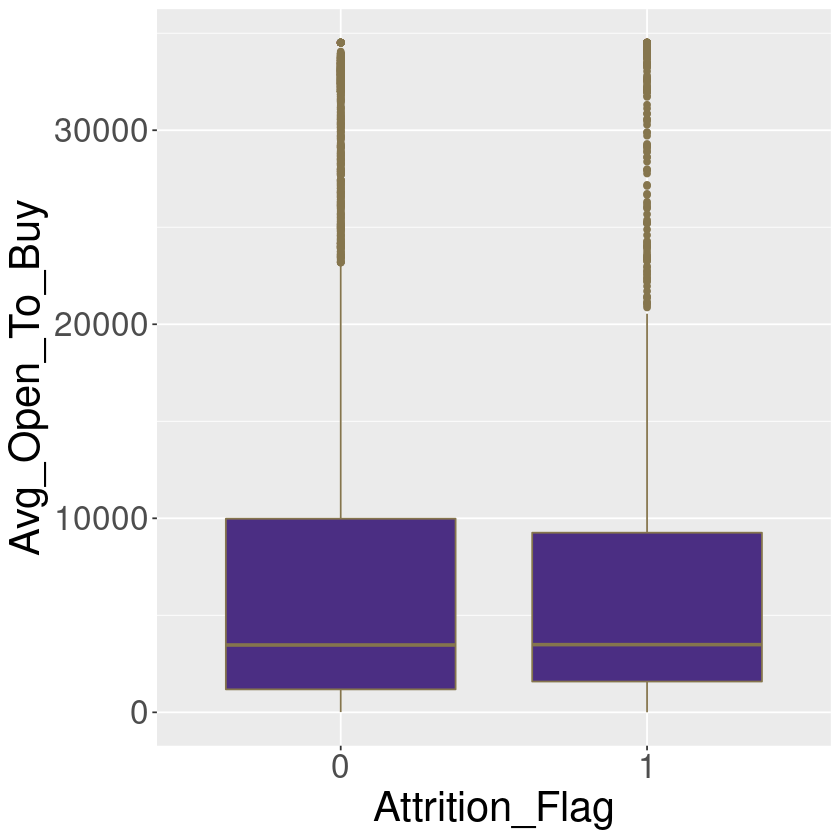

In [744]:
open_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Avg_Open_To_Buy), fill = "#4b2e83", color = "#85754d")

open_gg + theme(text = element_text(size = 25)) 

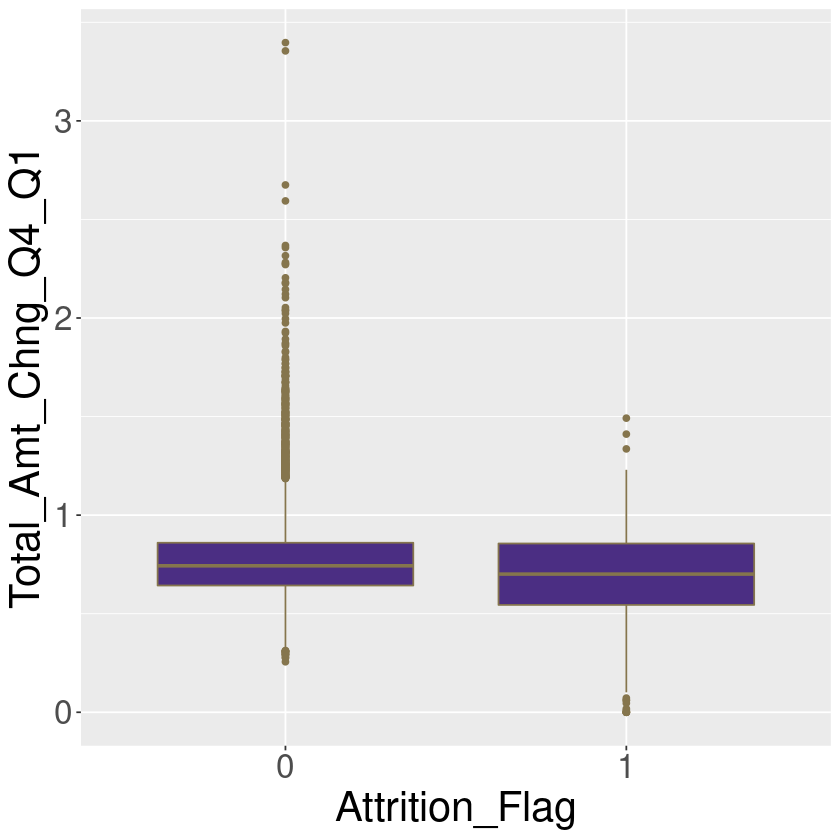

In [745]:
amtq4_gg <-ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Total_Amt_Chng_Q4_Q1), fill = "#4b2e83", color = "#85754d")

amtq4_gg + theme(text = element_text(size = 25)) 

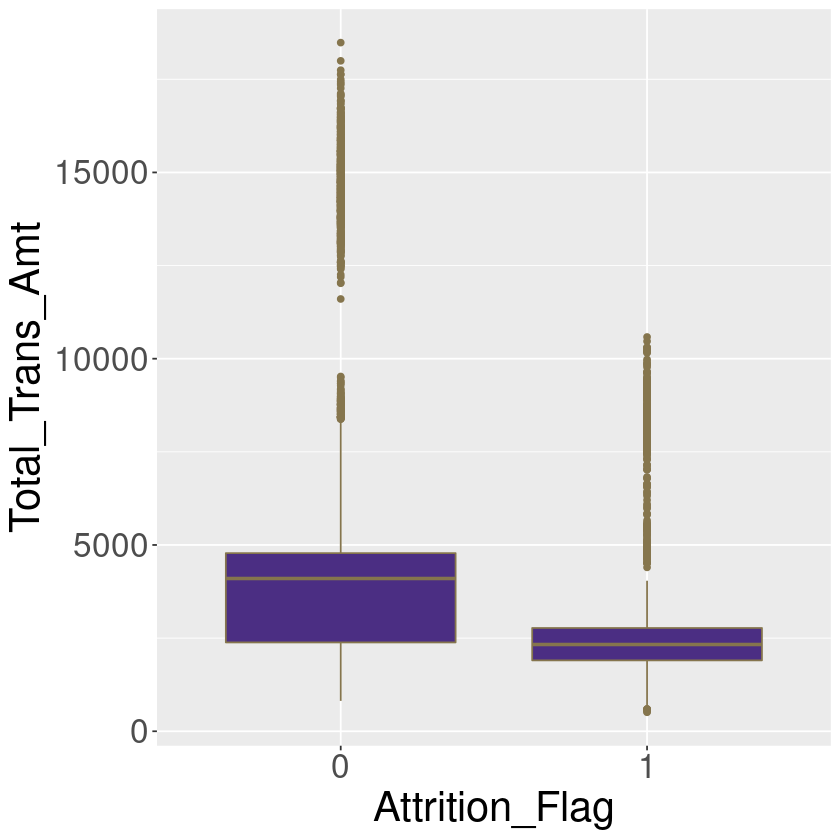

In [746]:
amt_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Total_Trans_Amt), fill = "#4b2e83", color = "#85754d")

amt_gg + theme(text = element_text(size = 25)) 

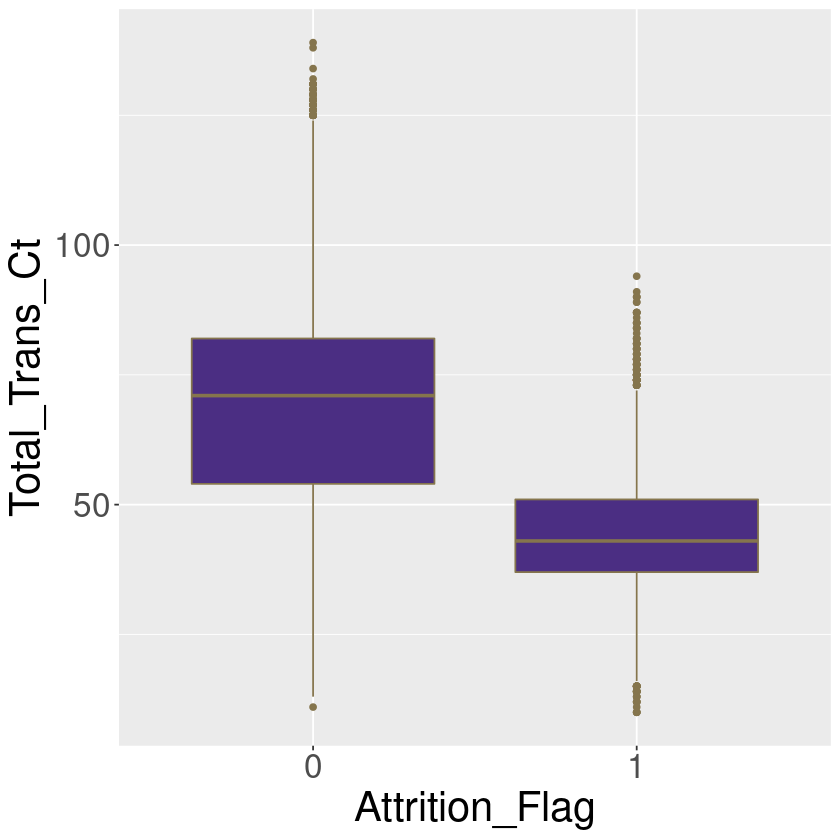

In [747]:
ct_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Total_Trans_Ct), fill = "#4b2e83", color = "#85754d")

ct_gg + theme(text = element_text(size = 25)) 

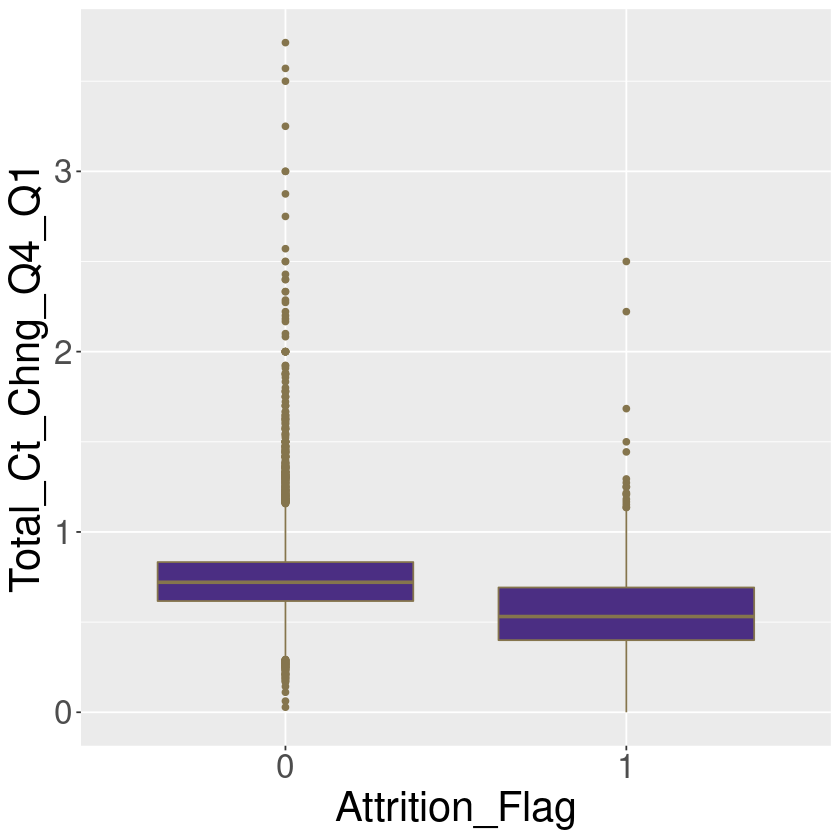

In [748]:
ctq_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Total_Ct_Chng_Q4_Q1),fill = "#4b2e83", color = "#85754d")

ctq_gg + theme(text = element_text(size = 25)) 

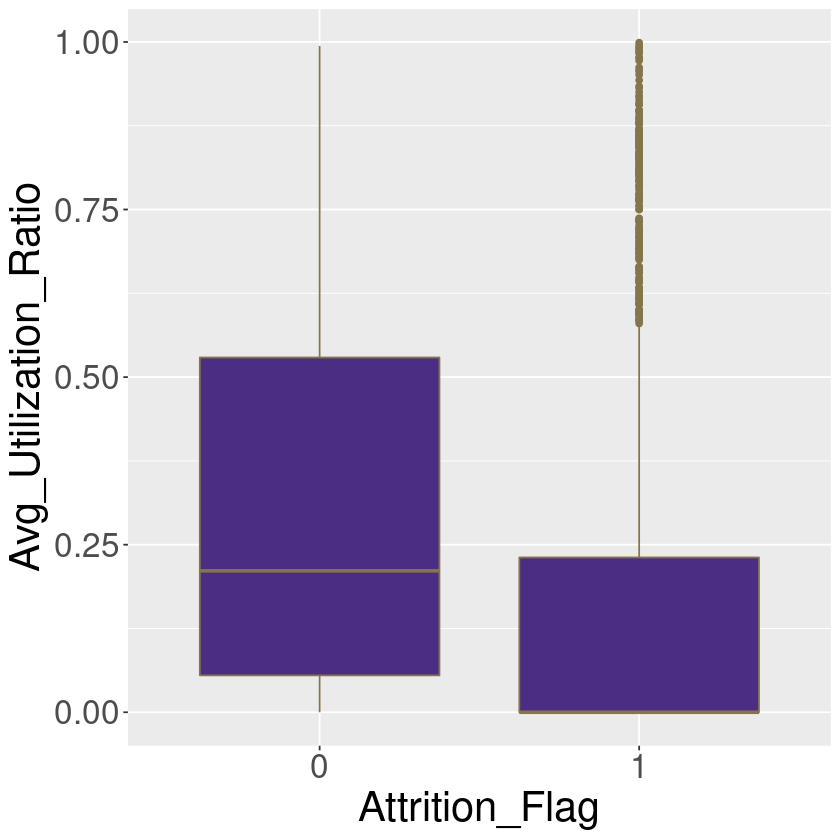

In [749]:
uti_gg <- ggplot(data = bank) + geom_boxplot(aes(x = Attrition_Flag, y= Avg_Utilization_Ratio), fill = "#4b2e83", color = "#85754d")

uti_gg + theme(text = element_text(size = 25)) 

### Feature Engineering: 

- Categorical Variables: Gender, Education_Level, Marital_Status,Income_Category, Card_Category
- Numerical Variables: Months_Inactive_12_mon, Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio 

## Supervised Learning 
- Classification Model: Decision Tree, Logistic Regression, Random Forest, XGBoost to classify if a customer is going to drop off.
- Compare different models

### Decision Tree Model

In [750]:
str(bank)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status          : Factor w/ 4 levels "Divorced","Married",..: 2 3 2 4 2 2 2 4 3 3 ...
 $ Income_Category         : Factor w/ 6 levels "$120K +","$40K - $60K",..: 3 5 4 5 3 2 1 3 3 4 ...
 $ Card_Category           : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Months_Inactive_1

**Partition the records into 70% training vs. 30% validation with the seed set to 1234**.
To create a train and validation set, we are going to split randomly this data set into 70% training set and 30% validation set.

We have nrow(bank) data points in total. We find the observations we want to include in the training set by randomly sample 70% × nrow(bank) indexes out of nrow(bank) observations.

Random seed is set using set.seed(1234) to control reproducibility so that every time you run the random partitioning, it will give you the same result.

In [751]:
set.seed(1234)  # set seed for reproducing the partition
# Random sample indexes
train.index <- sample(1:nrow(bank), nrow(bank)*0.7) 
train.df <- bank[train.index, ]
valid.df <- bank[-train.index, ]

**Build classification tree from training data.**
Overfitting can definitely happen if your tree is too big. There are two ways to limit the tree size. 1. Set criteria to stop tree growth. 2. First grow the tree to full size, and then prune it back.
In order to use the CART model in R, we need to install and use the rpart library.

In [752]:
library(rpart)

In [753]:
install.packages("rpart.plot")

Installing rpart.plot [3.1.1] ...
	OK [linked cache]


In [754]:
library(rpart.plot)

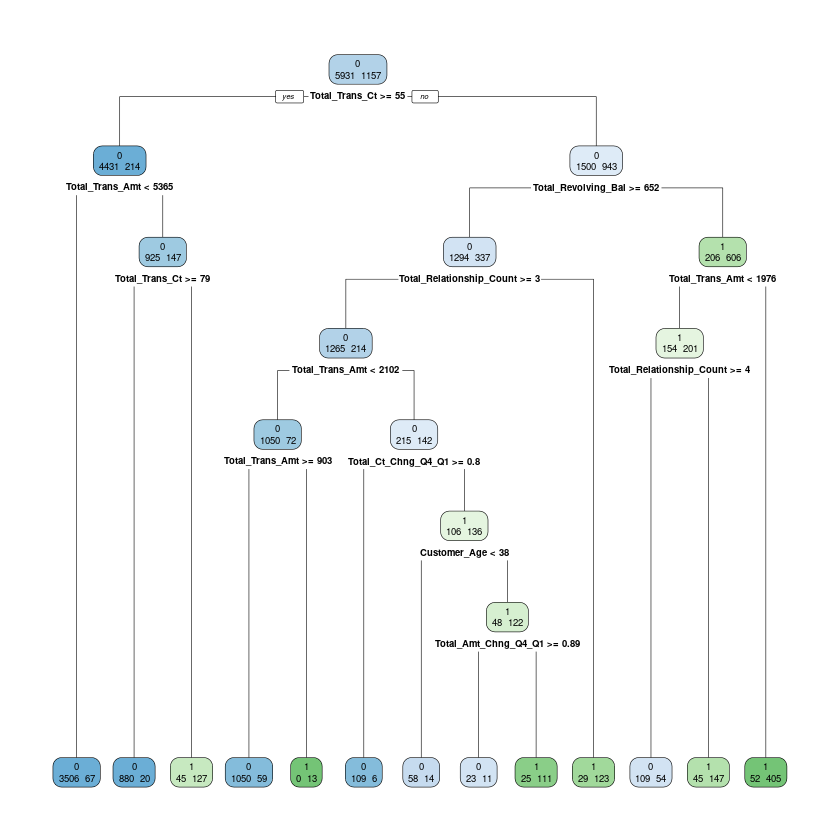

In [755]:
# Default classification tree
default.ct <- rpart(Attrition_Flag ~ ., data = train.df[,-1], method = "class") # remove first row (id) for the model
# plot tree
rpart.plot(default.ct, extra = 1)

In [756]:
# Interpret the fitted tree
default.ct

n= 7088 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 7088 1157 0 (0.83676637 0.16323363)  
    2) Total_Trans_Ct>=54.5 4645  214 0 (0.95392896 0.04607104)  
      4) Total_Trans_Amt< 5365 3573   67 0 (0.98124825 0.01875175) *
      5) Total_Trans_Amt>=5365 1072  147 0 (0.86287313 0.13712687)  
       10) Total_Trans_Ct>=78.5 900   20 0 (0.97777778 0.02222222) *
       11) Total_Trans_Ct< 78.5 172   45 1 (0.26162791 0.73837209) *
    3) Total_Trans_Ct< 54.5 2443  943 0 (0.61399918 0.38600082)  
      6) Total_Revolving_Bal>=651.5 1631  337 0 (0.79337830 0.20662170)  
       12) Total_Relationship_Count>=2.5 1479  214 0 (0.85530764 0.14469236)  
         24) Total_Trans_Amt< 2101.5 1122   72 0 (0.93582888 0.06417112)  
           48) Total_Trans_Amt>=902.5 1109   59 0 (0.94679892 0.05320108) *
           49) Total_Trans_Amt< 902.5 13    0 1 (0.00000000 1.00000000) *
         25) Total_Trans_Amt>=2101.5 357  142 0 (0.60224090 0.39775910)  
           50)

In [757]:
# important features
default.ct$variable.importance

Total_Trans_Ct          Total_Trans_Amt      Total_Revolving_Bal 
              557.868804               465.500817               316.556842 
   Avg_Utilization_Ratio Total_Relationship_Count      Total_Ct_Chng_Q4_Q1 
              277.286448               178.571606               153.563170 
    Total_Amt_Chng_Q4_Q1             Credit_Limit             Customer_Age 
               76.095620                59.101811                31.400247 
         Avg_Open_To_Buy           Months_on_book    Contacts_Count_12_mon 
               19.691822                17.703451                 9.362946 
  Months_Inactive_12_mon                   Gender          Dependent_count 
                5.101476                 3.688816                 2.279066 
           Card_Category 
                1.444352

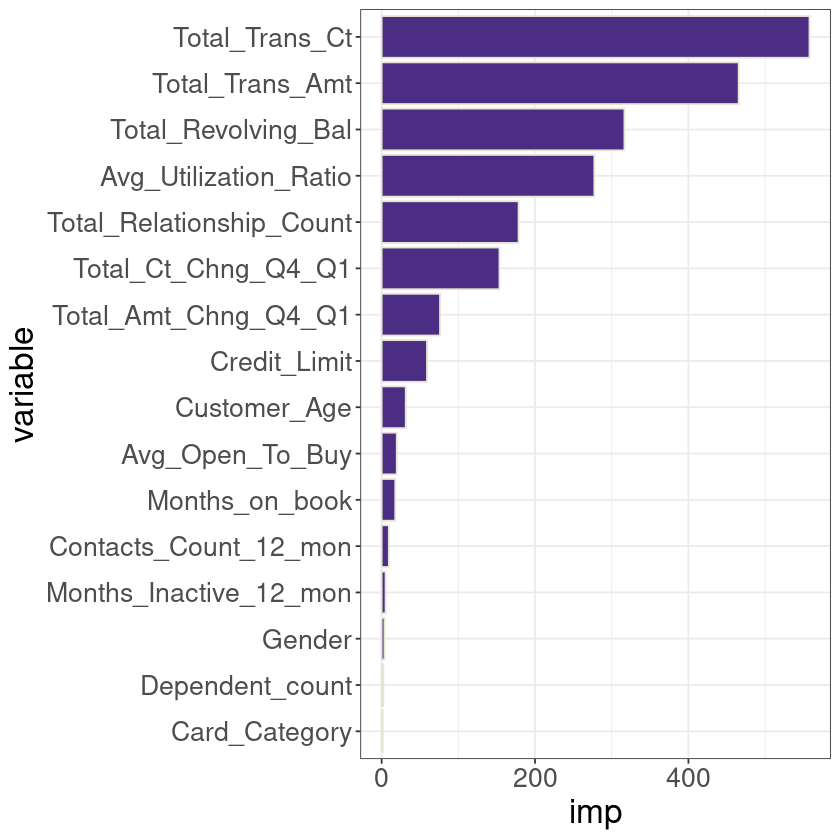

In [758]:
# plot the importance of variables
library(rpart)
library(tidyverse)
df <- data.frame(imp = default.ct$variable.importance)
df2 <- df %>% 
  tibble::rownames_to_column() %>% 
  dplyr::rename("variable" = rowname) %>% 
  dplyr::arrange(imp) %>%
  dplyr::mutate(variable = forcats::fct_inorder(variable))
dt_imp <-  ggplot(df2) +
  geom_col(aes(x = variable, y = imp),fill = "#4b2e83",
           col = "#e8e3d3", show.legend = F) +
  coord_flip() +
  scale_fill_grey() +
  theme_bw()

dt_imp + theme(text = element_text(size = 20)) 

**The result of important features (top 5)**
 - Total_Trans_Amt
 - Total_Trans_Ct
 - Total_Revolving_Bal
 - Avg_Utilization_Ratio
 - Total_Relationship_Count
 
 **Performance Evaluation**

In [759]:

# classify records in the validation data.
# set argument type = "class" in predict() to generate predicted class membership.
# Otherwise, a probablity of belonging to each class
default.ct.point.pred <- predict(default.ct, valid.df[,-1], type = "class")

In [760]:
install.packages("caret")

Installing caret [6.0-93] ...
	OK [linked cache]


In [761]:
library(caret)

In [762]:
# generate confusion matrix for validation data
confusionMatrix(default.ct.point.pred, factor(valid.df$Attrition_Flag))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2456  112
         1  113  358
                                         
               Accuracy : 0.926          
                 95% CI : (0.9161, 0.935)
    No Information Rate : 0.8453         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.7171         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9560         
            Specificity : 0.7617         
         Pos Pred Value : 0.9564         
         Neg Pred Value : 0.7601         
             Prevalence : 0.8453         
         Detection Rate : 0.8082         
   Detection Prevalence : 0.8450         
      Balanced Accuracy : 0.8589         
                                         
       'Positive' Class : 0              
                                         

### Logistic Regression
- Logistic regression is a method for fitting a regression curve, y=f(x), when y is a binary variable. The typical use of this model is predicting y given a set of predictors x. The predictors can be continuous, categorical or a mix of both.

In [763]:
str(bank)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status          : Factor w/ 4 levels "Divorced","Married",..: 2 3 2 4 2 2 2 4 3 3 ...
 $ Income_Category         : Factor w/ 6 levels "$120K +","$40K - $60K",..: 3 5 4 5 3 2 1 3 3 4 ...
 $ Card_Category           : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Months_Inactive_1

In [764]:
# Preprocess the data
levels(bank$Gender)

[1] "F" "M"

In [765]:
levels(bank$Education_Level)

[1] "College"       "Doctorate"     "Graduate"      "High School"  
[5] "Post-Graduate" "Uneducated"    "Unknown"

In [766]:
levels(bank$Marital_Status)

[1] "Divorced" "Married"  "Single"   "Unknown"

In [767]:
levels(bank$Income_Category)

[1] "$120K +"        "$40K - $60K"    "$60K - $80K"    "$80K - $120K"  
[5] "Less than $40K" "Unknown"

In [768]:
levels(bank$Card_Category )

[1] "Blue"     "Gold"     "Platinum" "Silver"

In [769]:
# create reference category or base level
bank$Gender <- relevel(bank$Gender, ref = "F")
bank$Education_Level <- relevel(bank$Education_Level, ref = "College")
bank$Marital_Status <- relevel(bank$Marital_Status, ref = "Married")
bank$Income_Category <- relevel(bank$Income_Category, ref = "$40K - $60K")
bank$ Card_Category <- relevel(bank$ Card_Category, ref = "Blue")
bank$Attrition_Flag <- as.numeric(bank$Attrition_Flag == "1")

In [770]:
str(bank)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status          : Factor w/ 4 levels "Married","Divorced",..: 1 3 1 4 1 1 1 4 3 3 ...
 $ Income_Category         : Factor w/ 6 levels "$40K - $60K",..: 3 5 4 5 3 1 2 3 3 4 ...
 $ Card_Category           : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Months_Inactive_12_mon  : int  1 1 1 4 1 1 1 2 2 3

In [771]:
summary(bank)

   CLIENTNUM         Attrition_Flag    Customer_Age   Gender   Dependent_count
 Min.   :708082083   Min.   :0.0000   Min.   :26.00   F:5358   Min.   :0.000  
 1st Qu.:713036770   1st Qu.:0.0000   1st Qu.:41.00   M:4769   1st Qu.:1.000  
 Median :717926358   Median :0.0000   Median :46.00            Median :2.000  
 Mean   :739177606   Mean   :0.1607   Mean   :46.33            Mean   :2.346  
 3rd Qu.:773143533   3rd Qu.:0.0000   3rd Qu.:52.00            3rd Qu.:3.000  
 Max.   :828343083   Max.   :1.0000   Max.   :73.00            Max.   :5.000  
                                                                              
      Education_Level  Marital_Status       Income_Category  Card_Category 
 College      :1013   Married :4687   $40K - $60K   :1790   Blue    :9436  
 Doctorate    : 451   Divorced: 748   $120K +       : 727   Gold    : 116  
 Graduate     :3128   Single  :3943   $60K - $80K   :1402   Platinum:  20  
 High School  :2013   Unknown : 749   $80K - $120K  :1535   Silv

In [772]:
# Partition data
set.seed(1234)
train.index <- sample(1:nrow(bank), nrow(bank)*0.7) 
train.df <- bank[train.index, ]
valid.df <- bank[-train.index, ]

In [773]:
# Fit a logistic regression model
# run logistic model, and show coefficients 
train_data <- train.df[,c(-1,-16)]
logit.reg <- glm(Attrition_Flag ~ ., data = train_data, family = "binomial")
summary(logit.reg)


Call:
glm(formula = Attrition_Flag ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7205  -0.3613  -0.1669  -0.0644   3.4991  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    5.662e+00  4.816e-01  11.756  < 2e-16 ***
Customer_Age                  -1.144e-02  9.331e-03  -1.226 0.220159    
GenderM                       -8.353e-01  1.721e-01  -4.855  1.2e-06 ***
Dependent_count                1.373e-01  3.593e-02   3.821 0.000133 ***
Education_LevelDoctorate       2.586e-01  2.460e-01   1.051 0.293177    
Education_LevelGraduate       -1.053e-01  1.634e-01  -0.645 0.519247    
Education_LevelHigh School    -2.080e-01  1.757e-01  -1.184 0.236469    
Education_LevelPost-Graduate   1.778e-01  2.432e-01   0.731 0.464671    
Education_LevelUneducated     -1.786e-02  1.839e-01  -0.097 0.922599    
Education_LevelUnknown        -3.709e-02  1.842e-01  -0.201 

In [774]:
# Generate outcome by comparing predicted probability with the cutoff probability
# use predict() with type = "response" to compute predicted probabilities
# if type not specified, log-odds will be returned
logit.reg.pred <- predict(logit.reg, valid.df[,c(-1,-16)],  type = "response")

In [775]:
# Choose cutoff value and evaluate classification performance
pred <- ifelse(logit.reg.pred > 0.5, 1, 0)

In [776]:
confusionMatrix(factor(pred), factor(valid.df$Attrition_Flag), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2473  199
         1   96  271
                                          
               Accuracy : 0.9029          
                 95% CI : (0.8918, 0.9132)
    No Information Rate : 0.8453          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5922          
                                          
 Mcnemar's Test P-Value : 2.873e-09       
                                          
            Sensitivity : 0.57660         
            Specificity : 0.96263         
         Pos Pred Value : 0.73842         
         Neg Pred Value : 0.92552         
             Prevalence : 0.15466         
         Detection Rate : 0.08917         
   Detection Prevalence : 0.12076         
      Balanced Accuracy : 0.76961         
                                          
       'Positive' Class : 1               
                        

In [777]:
#Change the cutoff value to 0.1693
pred <- ifelse(logit.reg.pred > 0.1438, 1, 0)
confusionMatrix(factor(pred), factor(valid.df$Attrition_Flag), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2149   70
         1  420  400
                                          
               Accuracy : 0.8388          
                 95% CI : (0.8252, 0.8517)
    No Information Rate : 0.8453          
    P-Value [Acc > NIR] : 0.8481          
                                          
                  Kappa : 0.5272          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8511          
            Specificity : 0.8365          
         Pos Pred Value : 0.4878          
         Neg Pred Value : 0.9685          
             Prevalence : 0.1547          
         Detection Rate : 0.1316          
   Detection Prevalence : 0.2698          
      Balanced Accuracy : 0.8438          
                                          
       'Positive' Class : 1               
                        

In [778]:
# Generate ROC curve
library(pROC)

In [779]:
r <- roc(valid.df$Attrition_Flag, logit.reg.pred)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



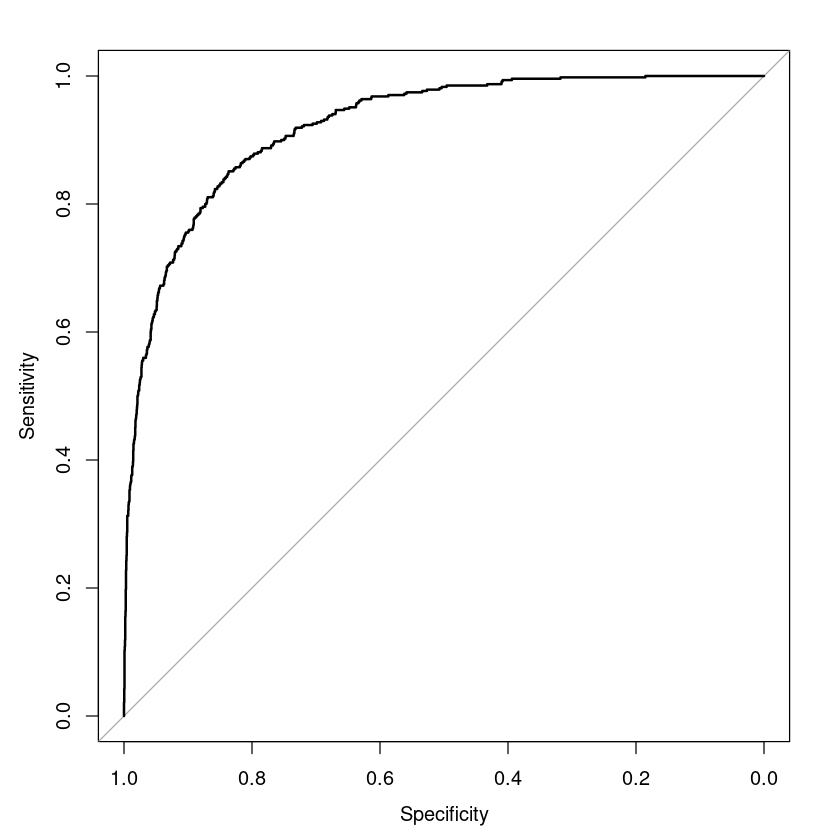

In [780]:
plot.roc(r)

In [781]:
# find the best threshold, with a default best method "youden"
coords(r, x = "best")

threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
0.1437976,0.8365123,0.8510638


### Random Forest

In [782]:
install.packages("randomForest")

Installing randomForest [4.7-1.1] ...
	OK [linked cache]


In [783]:
library(randomForest)

In [784]:
# model

bank$Attrition_Flag <- factor(bank$Attrition_Flag) # classification model
set.seed(1234)
train.index <- sample(1:nrow(bank), nrow(bank)*0.7) 
train.df <- bank[train.index, ]
valid.df <- bank[-train.index, ]
train_data <-train.df[,-1]
random_forest <- randomForest(Attrition_Flag ~., data = train_data)
random_forest


Call:
 randomForest(formula = Attrition_Flag ~ ., data = train_data) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 3.84%
Confusion matrix:
     0   1 class.error
0 5855  76  0.01281403
1  196 961  0.16940363

In [785]:
confusionMatrix(predict(random_forest,valid.df[,-1]), factor(valid.df$Attrition_Flag), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2539   87
         1   30  383
                                         
               Accuracy : 0.9615         
                 95% CI : (0.954, 0.9681)
    No Information Rate : 0.8453         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8451         
                                         
 Mcnemar's Test P-Value : 2.252e-07      
                                         
            Sensitivity : 0.8149         
            Specificity : 0.9883         
         Pos Pred Value : 0.9274         
         Neg Pred Value : 0.9669         
             Prevalence : 0.1547         
         Detection Rate : 0.1260         
   Detection Prevalence : 0.1359         
      Balanced Accuracy : 0.9016         
                                         
       'Positive' Class : 1              
                                         

In [786]:
## feature importance
#Evaluate variable importance
importance(random_forest)

,MeanDecreaseGini
Customer_Age,63.721819
Gender,13.024036
Dependent_count,25.125507
Education_Level,40.262626
Marital_Status,20.706181
Income_Category,31.901363
Card_Category,5.881078
Months_on_book,47.100347
Total_Relationship_Count,127.096229
Months_Inactive_12_mon,45.060071


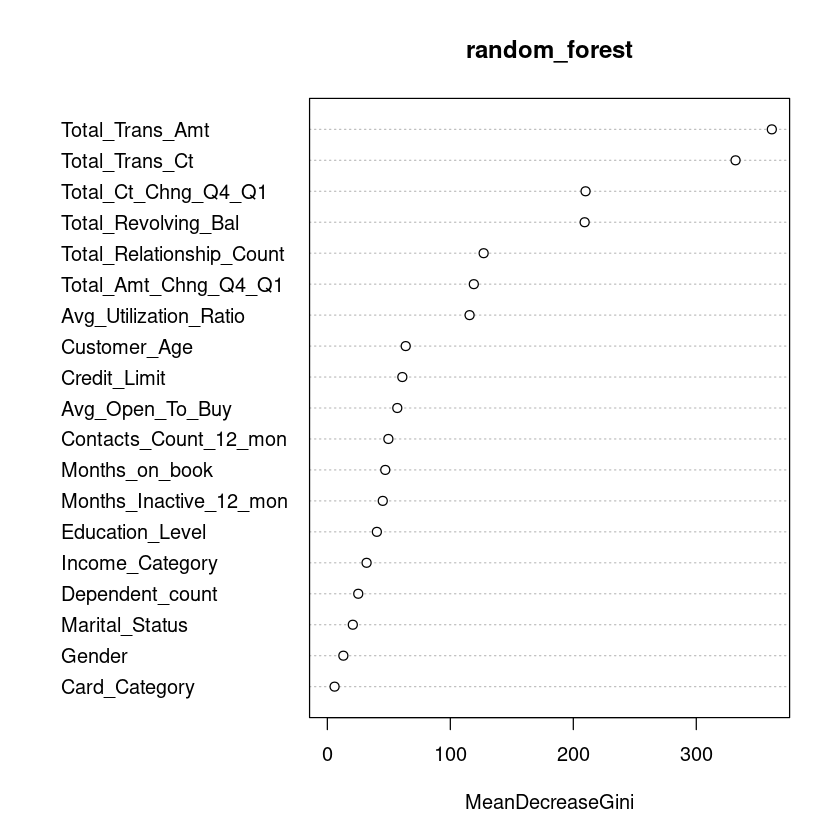

In [787]:
varImpPlot(random_forest)

###  XGBoost


In [788]:
install.packages("xgboost")

Installing xgboost [1.6.0.1] ...
	OK [linked cache]


In [789]:
library(e1071) 
library(xgboost)

In [790]:
train <- train.df[,-1]
valid <- valid.df[,-1]
X_train <- data.matrix(train[,-1])
y_train <- train[,1]
X_valid <-data.matrix(valid[,-1])
y_valid <- valid[,1]

# convert the train and valid data into xgboost matrix type.
xgboost_train = xgb.DMatrix(data=X_train, label=y_train)
xgboost_valid = xgb.DMatrix(data=X_valid, label=y_valid)

In [791]:
summary(y_valid)

0    1 
2569  470

In [792]:
xgboost1 <- xgboost(data = xgboost_train,                    # the data   
                 max.depth=6,                          # max depth 
                 nrounds=500)                              # max number of boosting iterations

[1]	train-rmse:0.550101 
[2]	train-rmse:0.406525 
[3]	train-rmse:0.309713 
[4]	train-rmse:0.246395 
[5]	train-rmse:0.203813 
[6]	train-rmse:0.177623 
[7]	train-rmse:0.159691 
[8]	train-rmse:0.146643 
[9]	train-rmse:0.137778 
[10]	train-rmse:0.132146 
[11]	train-rmse:0.126801 
[12]	train-rmse:0.122946 
[13]	train-rmse:0.121052 
[14]	train-rmse:0.117589 
[15]	train-rmse:0.115390 
[16]	train-rmse:0.113138 
[17]	train-rmse:0.111854 
[18]	train-rmse:0.111328 
[19]	train-rmse:0.110138 
[20]	train-rmse:0.108170 
[21]	train-rmse:0.106657 
[22]	train-rmse:0.106170 
[23]	train-rmse:0.104947 
[24]	train-rmse:0.104090 
[25]	train-rmse:0.102088 
[26]	train-rmse:0.100956 
[27]	train-rmse:0.098490 
[28]	train-rmse:0.096728 
[29]	train-rmse:0.095847 
[30]	train-rmse:0.094349 
[31]	train-rmse:0.092135 
[32]	train-rmse:0.091240 
[33]	train-rmse:0.090667 
[34]	train-rmse:0.090214 
[35]	train-rmse:0.089815 
[36]	train-rmse:0.088509 
[37]	train-rmse:0.087260 
[38]	train-rmse:0.086975 
[39]	train-rmse:0.086

In [793]:
xgboost1

##### xgb.Booster
raw: 1.8 Mb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max.depth = 6)
params (as set within xgb.train):
  max_depth = "6", validate_parameters = "1"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 19 
niter: 500
nfeatures : 19 
evaluation_log:
    iter  train_rmse
       1 0.550101327
       2 0.406525233
---                 
     499 0.003844771
     500 0.003829790

In [794]:
summary(xgboost1)

               Length  Class              Mode       
handle               1 xgb.Booster.handle externalptr
raw            1882430 -none-             raw        
niter                1 -none-             numeric    
evaluation_log       2 data.table         list       
call                14 -none-             call       
params               2 -none-             list       
callbacks            2 -none-             list       
feature_names       19 -none-             character  
nfeatures            1 -none-             numeric    

In [795]:
#use model to make predictions on valid data
pred = predict(xgboost1, xgboost_valid)

pred

[1] 0.9842226 0.9595988 1.0299520 1.2908790 0.9818964 1.2696664 0.9749271
   [8] 0.9924983 1.0564178 1.0018593 0.9981724 1.0516711 1.3004386 1.1025755
  [15] 1.1041242 1.0516472 1.2588093 1.9021939 1.5819248 0.9738421 0.9503453
  [22] 1.1890410 2.1580203 1.0655378 1.1719116 1.0134755 0.9728532 1.0058687
  [29] 1.4147596 0.9899225 0.9223885 2.0630229 1.1637053 0.9800230 1.3619039
  [36] 1.0092870 0.9469040 1.0043585 1.1005418 0.9968644 1.4088328 1.1417513
  [43] 2.0360906 1.0307862 1.3846518 0.9642094 1.2118778 1.0085393 1.0182384
  [50] 1.0023407 1.3367230 1.5972979 0.9879271 1.9034874 0.9760785 1.4106425
  [57] 1.0438850 1.1861520 1.6886053 1.0128487 0.9730579 1.4372994 1.0501997
  [64] 0.9793156 0.9439223 0.9417782 0.8969117 0.7538443 0.9777494 1.8167807
  [71] 1.0755600 1.1893909 1.1247265 1.0080153 0.9027995 1.4470946 1.1320242
  [78] 0.9919440 1.0203300 1.1149497 1.4304165 0.9568441 1.0466043 1.6430789
  [85] 1.1252103 0.8975379 1.1265607 0.9791355 0.9616593 1.7274301 1.0059172
  [92] 0.9722160 0.9408249 0.9651785 1.0419605 0.9997167 0.9904197 1.0249817
  [99] 1.4027616 1.0743725 0.9634557 1.2062074 0.9852278 1.0178216 1.0405566
 [106] 1.0000069 0.9919728 0.9603423 1.0506254 1.9744289 1.0526568 0.9768605
 [113] 0.9644849 0.9621380 1.0104004 1.0003879 0.9717047 1.0027931 1.0095869
 [120] 1.1638304 2.0798154 0.8901870 1.3995149 0.9517291 0.9522867 0.9282531
 [127] 2.0330493 0.9133266 0.9859553 0.9092967 1.0280759 1.0011873 1.1888429
 [134] 1.3378395 0.9865122 1.0676894 0.9761723 1.0008168 1.0025486 1.0511284
 [141] 1.8913140 0.8863962 1.0795302 1.0746732 1.0078007 0.9615578 1.0976639
 [148] 0.9904228 0.8869292 0.9407501 1.1508487 1.0333520 0.8915601 0.9914352
 [155] 0.9363564 1.0065572 0.9805363 0.9786325 1.0334793 1.9639053 1.0734857
 [162] 1.1192942 1.1722026 0.9709762 0.9480537 0.9747503 0.9863569 1.1993108
 [169] 0.9288064 2.2220960 2.0153391 0.8040183 1.0182213 0.9717908 1.9564914
 [176] 0.9494479 0.9440199 1.8734765 1.0437509 2.0582602 1.0028473 2.2049186
 [183] 1.1635149 1.0750749 1.0081462 0.9465088 0.9498835 1.0011820 1.0264190
 [190] 0.9727569 0.9066523 1.7224908 1.0175579 1.0051856 1.0275434 1.0531818
 [197] 1.0965879 1.0677314 1.1137692 1.1417607 0.9840442 1.9433347 1.0174969
 [204] 1.0683681 0.9727030 0.9961416 0.9578567 1.0740490 0.9889390 1.7998320
 [211] 1.6767297 0.9753816 0.9783105 1.0197488 1.1407924 1.9206353 1.0073104
 [218] 1.0197074 1.0091935 2.0327742 1.9666016 0.9101761 1.9219704 1.0103997
 [225] 0.9240634 0.9818866 0.9438609 1.0841601 1.1612692 0.9683634 0.9334212
 [232] 1.1643531 0.9472374 0.9465297 1.1935065 0.8895611 1.0157120 2.1207991
 [239] 1.0376366 1.3496737 0.9626380 0.9659462 0.9848701 1.0153064 0.9265943
 [246] 0.8994833 1.0288675 0.8405533 0.9166162 1.1490637 1.3603328 1.3085428
 [253] 1.0684981 1.0391866 1.0841767 0.9556636 0.9233427 0.8777851 1.7211661
 [260] 0.9809834 1.1193607 0.9603084 1.0513856 1.0030833 1.8175001 0.9702785
 [267] 1.0138910 0.9998350 1.0953126 0.9312514 1.0189594 0.9275173 0.9357294
 [274] 1.0629036 1.0003254 2.0947628 1.4227668 0.9649042 0.9373923 1.4280514
 [281] 1.0713317 1.0555090 1.3957789 1.2026893 1.1493535 1.0080431 0.9813628
 [288] 1.1674970 1.0220315 0.9668863 1.0287511 1.1760985 0.9937214 1.1219277
 [295] 0.9031926 1.1201069 0.9846267 1.0147116 1.0093706 1.2086093 1.0094186
 [302] 0.9736665 0.9603179 1.0982682 1.1043828 1.0535346 1.0309960 1.0487078
 [309] 0.9592948 1.2521143 1.0108933 1.0520867 0.9400596 1.1471289 0.9889522
 [316] 0.9862332 1.6419344 0.9857177 0.9740856 1.5666775 1.0227338 1.0508155
 [323] 0.9670531 0.9935791 1.2227542 1.0940665 1.4711145 1.1564020 0.9897014
 [330] 1.0015765 0.9752945 1.0617008 1.2971753 1.8195010 1.1263107 1.0094012
 [337] 1.6244135 2.1487217 0.9949245 0.8545812 0.9720690 1.5170487 1.0468668
 [344] 0.9938228 0.9352446 0.9998846 1.1949426 1.1141862 1.0308276 2.0155759
 [351] 1.0483277 0.9509677 1.0094686 0.9910689 1.0048792 1.0125091 0.9891096
 [358] 0.9797922 1.0264485 1.6862985 0.9296722 1.4222674 0.9582573 1.4158621

In [796]:
# Convert prediction to factor type

pred[(pred>3)] = 3
pred_y = as.factor((levels(y_valid))[round(pred)])
print(pred_y)

   [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  [38] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [112] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 [186] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0
 [223] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [260] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0

In [797]:
# There is NA in pred_y[2947]

summary(pred_y)

0    1 
2589  450

In [798]:
summary(y_valid)

0    1 
2569  470

In [799]:
confusionMatrix(pred_y,y_valid, positive = "1")


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2524   65
         1   45  405
                                          
               Accuracy : 0.9638          
                 95% CI : (0.9565, 0.9702)
    No Information Rate : 0.8453          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8591          
                                          
 Mcnemar's Test P-Value : 0.07005         
                                          
            Sensitivity : 0.8617          
            Specificity : 0.9825          
         Pos Pred Value : 0.9000          
         Neg Pred Value : 0.9749          
             Prevalence : 0.1547          
         Detection Rate : 0.1333          
   Detection Prevalence : 0.1481          
      Balanced Accuracy : 0.9221          
                                          
       'Positive' Class : 1               
                        

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
Total_Trans_Ct,0.3079314980,0.068669327,0.074264673
Total_Revolving_Bal,0.1850734308,0.062500903,0.057450867
Total_Trans_Amt,0.1598863533,0.190410963,0.130029724
Total_Relationship_Count,0.0936545614,0.011462799,0.031231977
Total_Ct_Chng_Q4_Q1,0.0767662587,0.105933591,0.087839936
Total_Amt_Chng_Q4_Q1,0.0549043735,0.137838096,0.095869748
Customer_Age,0.0340213771,0.037173791,0.111574464
Credit_Limit,0.0167120037,0.106755295,0.082738122
Contacts_Count_12_mon,0.0137869512,0.018345788,0.025863981


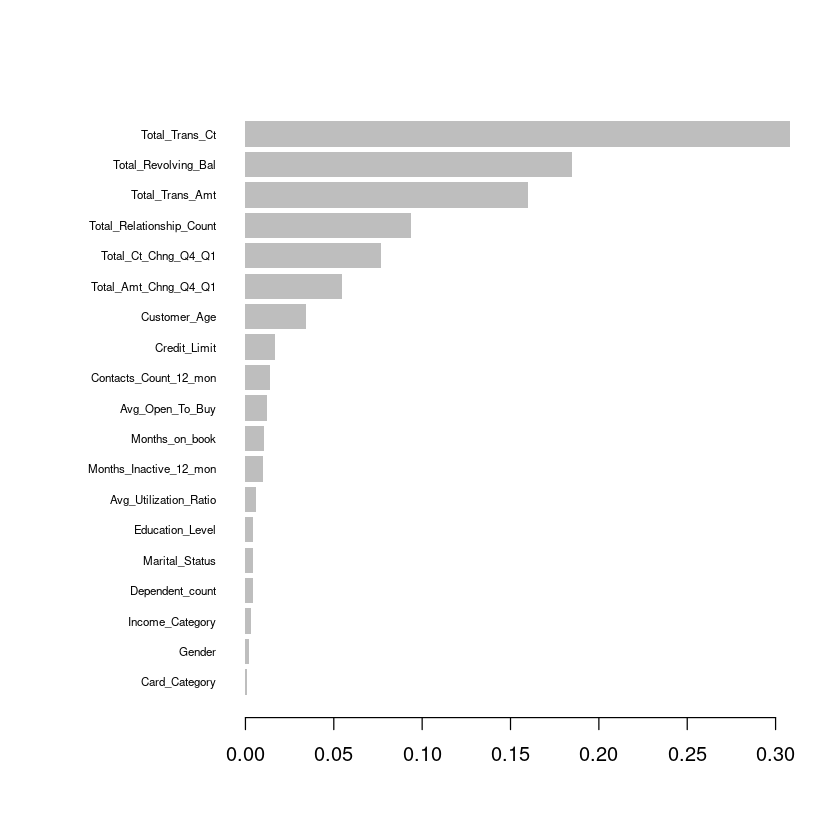

In [800]:
# Compute feature importance matrix
importance_matrix <-  xgb.importance(colnames(xgboost_train), model = xgboost1)
importance_matrix
xgb_gg <- xgb.plot.importance(importance_matrix[1:19,])

### Model Comparison

| Metric/Model |Decision Tree | Random Forest  | Logistic Regression | XGBoost | 
| ------------ | ------------ | -------------- | ------------------- | --------|
|   Accuracy   |      0.9260    |      0.9615     |        0.8388        | 0.9638  |
|Sensitivity | 0.7617 |0.8149 |0.8511 |0.8617
|Specificity | 0.9560 | 0.9883|0.8365|0.9825

**We will choose the XGboost Model to predict attrition.**

## Unsupervised Model : Customer Segmentation

In [801]:
# only attrition customers
# select part of part of variables
bank1 <- read.csv("data/bank_clean.csv")
attrition <- bank1[bank1$Attrition_Flag == "1",c(6,8,15,18,20,21)]
str(attrition)

'data.frame':	1627 obs. of  6 variables:
 $ Education_Level      : chr  "Graduate" "Doctorate" "Graduate" "Graduate" ...
 $ Income_Category      : chr  "Less than $40K" "Unknown" "Less than $40K" "$120K +" ...
 $ Total_Revolving_Bal  : int  0 605 808 0 0 0 1628 2227 0 0 ...
 $ Total_Trans_Amt      : int  692 704 705 602 691 615 836 720 673 530 ...
 $ Total_Ct_Chng_Q4_Q1  : num  0.6 0.143 0.9 0.364 0.5 0.714 0.385 0.353 0.8 1 ...
 $ Avg_Utilization_Ratio: num  0 0.077 0.562 0 0 0 0.299 0.191 0 0 ...


In [802]:
head(attrition)

,Education_Level,Income_Category,Total_Revolving_Bal,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
22,Graduate,Less than $40K,0,692,0.600,0.000
40,Doctorate,Unknown,605,704,0.143,0.077
52,Graduate,Less than $40K,808,705,0.900,0.562
55,Graduate,$120K +,0,602,0.364,0.000
62,Graduate,$60K - $80K,0,691,0.500,0.000
83,Unknown,$40K - $60K,0,615,0.714,0.000


In [803]:
attrition$Education_Level[attrition$Education_Level == 'College'] <- 4
attrition$Education_Level[attrition$Education_Level == 'Doctorate'] <- 7
attrition$Education_Level[attrition$Education_Level == 'Graduate'] <- 5
attrition$Education_Level[attrition$Education_Level == 'High School'] <- 3
attrition$Education_Level[attrition$Education_Level == 'Post-Graduate'] <- 6
attrition$Education_Level[attrition$Education_Level == 'Uneducated'] <- 2
attrition$Education_Level[attrition$Education_Level == 'Unknown'] <- 1




In [804]:
attrition$Education_Level

[1] "5" "7" "5" "5" "5" "1" "1" "5" "3" "4" "2" "5" "1" "3" "5" "6" "2" "2"
  [19] "1" "4" "4" "3" "3" "6" "3" "5" "3" "3" "5" "5" "1" "2" "6" "2" "4" "5"
  [37] "5" "2" "1" "5" "2" "5" "2" "6" "2" "4" "6" "2" "1" "4" "7" "5" "6" "3"
  [55] "3" "4" "1" "4" "3" "1" "2" "7" "2" "1" "5" "4" "7" "5" "5" "3" "1" "5"
  [73] "3" "3" "5" "1" "1" "1" "4" "5" "2" "2" "3" "7" "5" "3" "3" "5" "3" "2"
  [91] "3" "4" "3" "3" "2" "3" "5" "2" "3" "3" "1" "7" "5" "5" "3" "5" "1" "5"
 [109] "6" "3" "3" "4" "5" "5" "3" "4" "1" "3" "2" "5" "4" "5" "2" "3" "3" "5"
 [127] "5" "3" "1" "2" "5" "4" "5" "5" "3" "5" "5" "6" "6" "6" "5" "1" "4" "5"
 [145] "5" "3" "3" "3" "5" "4" "4" "5" "4" "2" "4" "6" "2" "5" "3" "2" "5" "3"
 [163] "4" "5" "5" "3" "2" "5" "3" "3" "6" "2" "4" "5" "7" "2" "6" "5" "1" "3"
 [181] "3" "2" "5" "4" "4" "5" "7" "5" "5" "7" "3" "2" "5" "5" "3" "4" "2" "5"
 [199] "2" "5" "5" "3" "5" "5" "1" "3" "5" "6" "1" "4" "3" "7" "2" "5" "5" "2"
 [217] "1" "1" "5" "4" "3" "1" "3" "4" "5" "6" "3" "6" "5" "5" "1" "5" "1" "4"
 [235] "2" "1" "3" "5" "3" "2" "1" "2" "1" "1" "5" "5" "1" "2" "2" "7" "7" "2"
 [253] "5" "5" "5" "3" "5" "1" "5" "4" "5" "5" "5" "1" "5" "7" "5" "7" "5" "1"
 [271] "3" "3" "5" "5" "5" "5" "5" "5" "7" "4" "3" "5" "3" "5" "3" "2" "3" "5"
 [289] "5" "1" "1" "5" "5" "2" "5" "3" "3" "2" "7" "3" "1" "1" "4" "5" "1" "1"
 [307] "3" "1" "3" "6" "5" "5" "7" "5" "6" "2" "5" "6" "3" "1" "1" "5" "4" "5"
 [325] "5" "5" "1" "7" "2" "5" "1" "3" "5" "2" "6" "4" "2" "3" "1" "3" "2" "3"
 [343] "3" "3" "5" "1" "4" "6" "2" "5" "1" "6" "1" "5" "5" "5" "2" "7" "2" "4"
 [361] "4" "1" "5" "2" "5" "3" "5" "3" "1" "5" "4" "3" "4" "4" "5" "5" "4" "2"
 [379] "4" "3" "2" "2" "1" "3" "3" "2" "2" "5" "5" "7" "7" "6" "4" "2" "5" "3"
 [397] "4" "5" "1" "3" "1" "5" "5" "5" "2" "5" "5" "3" "5" "1" "3" "5" "5" "4"
 [415] "3" "1" "2" "3" "2" "3" "5" "5" "7" "5" "5" "6" "5" "1" "2" "4" "5" "5"
 [433] "2" "4" "5" "2" "2" "1" "7" "5" "7" "3" "3" "5" "5" "2" "4" "2" "3" "7"
 [451] "5" "2" "5" "3" "4" "5" "5" "3" "6" "5" "2" "3" "5" "3" "7" "5" "5" "5"
 [469] "1" "5" "5" "5" "5" "4" "5" "1" "3" "3" "1" "6" "1" "5" "4" "4" "1" "1"
 [487] "1" "1" "7" "3" "6" "5" "6" "5" "7" "5" "5" "1" "5" "3" "5" "2" "4" "4"
 [505] "1" "1" "5" "1" "5" "5" "5" "1" "5" "2" "5" "1" "1" "5" "2" "4" "1" "5"
 [523] "2" "2" "1" "5" "2" "1" "5" "2" "7" "4" "5" "5" "2" "5" "4" "7" "3" "5"
 [541] "5" "5" "5" "1" "5" "3" "6" "5" "5" "2" "1" "3" "5" "4" "3" "7" "1" "1"
 [559] "5" "7" "2" "3" "4" "7" "2" "4" "3" "1" "2" "1" "6" "3" "1" "3" "2" "6"
 [577] "5" "5" "2" "1" "1" "2" "2" "2" "1" "4" "2" "4" "2" "2" "7" "5" "5" "7"
 [595] "2" "5" "3" "5" "2" "3" "3" "6" "5" "1" "4" "4" "1" "5" "1" "3" "2" "6"
 [613] "5" "2" "2" "5" "6" "3" "1" "3" "1" "7" "5" "4" "5" "1" "5" "1" "1" "3"
 [631] "2" "2" "5" "3" "2" "2" "2" "7" "2" "7" "3" "2" "6" "3" "2" "7" "5" "1"
 [649] "3" "1" "5" "1" "2" "5" "5" "5" "1" "5" "3" "2" "1" "7" "5" "5" "5" "1"
 [667] "6" "5" "6" "3" "3" "1" "5" "3" "4" "1" "6" "7" "5" "5" "3" "5" "6" "4"
 [685] "5" "4" "5" "4" "1" "3" "7" "1" "1" "5" "7" "2" "7" "5" "3" "4" "7" "1"
 [703] "7" "7" "5" "3" "5" "2" "2" "2" "5" "3" "3" "3" "2" "5" "5" "5" "1" "4"
 [721] "7" "3" "7" "1" "5" "5" "3" "1" "5" "1" "2" "5" "5" "3" "5" "5" "5" "4"
 [739] "5" "2" "5" "2" "5" "2" "7" "2" "1" "5" "3" "5" "3" "5" "1" "7" "5" "7"
 [757] "2" "5" "7" "5" "3" "1" "5" "5" "5" "6" "3" "2" "3" "2" "5" "1" "5" "3"
 [775] "5" "3" "5" "5" "3" "3" "4" "7" "5" "1" "3" "3" "2" "3" "5" "2" "2" "5"
 [793] "3" "5" "3" "1" "1" "5" "1" "5" "4" "2" "3" "3" "6" "5" "2" "4" "5" "5"
 [811] "1" "2" "2" "1" "4" "7" "5" "2" "1" "3" "7" "4" "5" "3" "3" "5" "3" "7"
 [829] "7" "1" "2" "5" "4" "1" "5" "5" "3" "7" "3" "6" "2" "1" "7" "7" "3" "3"
 [847] "3" "1" "2" "5" "5" "5" "5" "1" "2" "2" "3" "6" "5" "7" "7" "3" "5" "2"
 [865] "5" "3" "4" "2" "3" "6" "2" "3" "4" "2" "1" "2" "3" "5" "1" "5" "3" "5"
 [883] "5" "5" "7" "5" "4" "4" "1" "3" "5" "6" "5" "2" "3" "3" "4" "5" "1" "3"
 [901] "3" "1" "5" "5" "4" "3" "1" "5" "1" "2" "5" "4

In [805]:
attrition$Education_Level <- as.numeric(attrition$Education_Level)
attrition$Education_Level

[1] 5 7 5 5 5 1 1 5 3 4 2 5 1 3 5 6 2 2 1 4 4 3 3 6 3 5 3 3 5 5 1 2 6 2 4 5 5
  [38] 2 1 5 2 5 2 6 2 4 6 2 1 4 7 5 6 3 3 4 1 4 3 1 2 7 2 1 5 4 7 5 5 3 1 5 3 3
  [75] 5 1 1 1 4 5 2 2 3 7 5 3 3 5 3 2 3 4 3 3 2 3 5 2 3 3 1 7 5 5 3 5 1 5 6 3 3
 [112] 4 5 5 3 4 1 3 2 5 4 5 2 3 3 5 5 3 1 2 5 4 5 5 3 5 5 6 6 6 5 1 4 5 5 3 3 3
 [149] 5 4 4 5 4 2 4 6 2 5 3 2 5 3 4 5 5 3 2 5 3 3 6 2 4 5 7 2 6 5 1 3 3 2 5 4 4
 [186] 5 7 5 5 7 3 2 5 5 3 4 2 5 2 5 5 3 5 5 1 3 5 6 1 4 3 7 2 5 5 2 1 1 5 4 3 1
 [223] 3 4 5 6 3 6 5 5 1 5 1 4 2 1 3 5 3 2 1 2 1 1 5 5 1 2 2 7 7 2 5 5 5 3 5 1 5
 [260] 4 5 5 5 1 5 7 5 7 5 1 3 3 5 5 5 5 5 5 7 4 3 5 3 5 3 2 3 5 5 1 1 5 5 2 5 3
 [297] 3 2 7 3 1 1 4 5 1 1 3 1 3 6 5 5 7 5 6 2 5 6 3 1 1 5 4 5 5 5 1 7 2 5 1 3 5
 [334] 2 6 4 2 3 1 3 2 3 3 3 5 1 4 6 2 5 1 6 1 5 5 5 2 7 2 4 4 1 5 2 5 3 5 3 1 5
 [371] 4 3 4 4 5 5 4 2 4 3 2 2 1 3 3 2 2 5 5 7 7 6 4 2 5 3 4 5 1 3 1 5 5 5 2 5 5
 [408] 3 5 1 3 5 5 4 3 1 2 3 2 3 5 5 7 5 5 6 5 1 2 4 5 5 2 4 5 2 2 1 7 5 7 3 3 5
 [445] 5 2 4 2 3 7 5 2 5 3 4 5 5 3 6 5 2 3 5 3 7 5 5 5 1 5 5 5 5 4 5 1 3 3 1 6 1
 [482] 5 4 4 1 1 1 1 7 3 6 5 6 5 7 5 5 1 5 3 5 2 4 4 1 1 5 1 5 5 5 1 5 2 5 1 1 5
 [519] 2 4 1 5 2 2 1 5 2 1 5 2 7 4 5 5 2 5 4 7 3 5 5 5 5 1 5 3 6 5 5 2 1 3 5 4 3
 [556] 7 1 1 5 7 2 3 4 7 2 4 3 1 2 1 6 3 1 3 2 6 5 5 2 1 1 2 2 2 1 4 2 4 2 2 7 5
 [593] 5 7 2 5 3 5 2 3 3 6 5 1 4 4 1 5 1 3 2 6 5 2 2 5 6 3 1 3 1 7 5 4 5 1 5 1 1
 [630] 3 2 2 5 3 2 2 2 7 2 7 3 2 6 3 2 7 5 1 3 1 5 1 2 5 5 5 1 5 3 2 1 7 5 5 5 1
 [667] 6 5 6 3 3 1 5 3 4 1 6 7 5 5 3 5 6 4 5 4 5 4 1 3 7 1 1 5 7 2 7 5 3 4 7 1 7
 [704] 7 5 3 5 2 2 2 5 3 3 3 2 5 5 5 1 4 7 3 7 1 5 5 3 1 5 1 2 5 5 3 5 5 5 4 5 2
 [741] 5 2 5 2 7 2 1 5 3 5 3 5 1 7 5 7 2 5 7 5 3 1 5 5 5 6 3 2 3 2 5 1 5 3 5 3 5
 [778] 5 3 3 4 7 5 1 3 3 2 3 5 2 2 5 3 5 3 1 1 5 1 5 4 2 3 3 6 5 2 4 5 5 1 2 2 1
 [815] 4 7 5 2 1 3 7 4 5 3 3 5 3 7 7 1 2 5 4 1 5 5 3 7 3 6 2 1 7 7 3 3 3 1 2 5 5
 [852] 5 5 1 2 2 3 6 5 7 7 3 5 2 5 3 4 2 3 6 2 3 4 2 1 2 3 5 1 5 3 5 5 5 7 5 4 4
 [889] 1 3 5 6 5 2 3 3 4 5 1 3 3 1 5 5 4 3 1 5 1 2 5 4 1 1 4 5 6 1 1 3 6 5 7 3 1
 [926] 5 1 1 5 3 5 5 3 3 2 5 1 5 2 3 3 5 5 5 6 5 5 2 1 1 1 6 5 1 3 5 2 3 3 5 7 5
 [963] 4 2 7 4 1 6 4 2 4 2 5 3 6 1 6 2 1 2 7 2 5 1 2 3 3 4 4 1 5 4 2 3 6 1 2 1 5
[1000] 2 4 6 1 5 5 2 5 4 5 4 3 5 5 3 5 3 4 3 3 1 7 7 5 1 5 5 3 5 4 5 1 6 7 5 2 3
[1037] 5 3 2 6 5 6 1 5 1 5 5 1 3 5 7 3 2 1 4 2 3 3 4 1 5 2 2 1 3 4 6 5 5 5 3 5 2
[1074] 5 3 1 2 4 5 5 5 2 6 7 5 3 2 5 1 5 7 5 4 3 4 5 5 4 4 3 2 3 4 1 1 4 2 3 3 4
[1111] 1 2 5 4 7 1 2 5 3 4 2 2 1 1 3 5 3 2 5 5 1 1 5 2 5 2 3 2 3 5 5 3 6 5 3 2 2
[1148] 3 2 4 2 3 1 3 5 5 5 5 7 3 4 3 4 5 5 3 1 1 5 5 2 7 1 3 1 5 5 7 1 1 4 3 5 5
[1185] 1 1 6 3 2 3 3 5 3 5 5 4 6 5 2 2 4 2 4 5 2 3 3 4 5 5 7 5 3 5 5 3 4 3 1 2 5
[1222] 2 7 5 1 7 3 3 1 4 4 7 1 5 3 5 5 4 1 3 5 5 5 5 3 3 3 1 2 5 3 5 2 3 2 7 5 1
[1259] 5 2 1 2 1 3 1 7 3 5 3 5 3 5 2 4 3 1 3 5 5 3 5 2 1 1 4 1 3 5 5 5 1 3 4 2 3
[1296] 3 5 5 1 2 3 4 1 3 6 5 5 6 3 3 3 1 4 7 5 6 6 1 3 1 5 5 1 6 3 3 3 6 6 3 4 1
[1333] 4 3 6 6 1 3 4 5 6 5 5 1 1 1 3 6 5 6 4 4 5 5 3 3 4 3 3 1 6 6 1 5 6 5 3 3 5
[1370] 3 1 5 1 1 3 5 1 1 2 3 4 4 5 5 2 2 2 1 2 5 5 2 2 2 2 3 5 1 5 3 2 2 5 4 5 5
[1407] 5 2 5 4 1 1 4 6 5 2 1 3 3 5 2 5 5 5 4 1 6 5 3 5 5 1 1 6 2 4 3 5 6 3 5 1 4
[1444] 3 2 1 3 5 2 3 7 2 1 5 5 5 2 5 5 5 5 5 5 1 2 5 6 4 1 1 4 6 5 2 1 4 2 1 1 5
[1481] 6 6 3 2 3 3 2 6 2 4 3 1 2 5 6 5 1 4 1 3 7 5 1 5 4 3 1 5 5 1 2 2 4 7 2 2 5
[1518] 6 5 1 5 5 3 3 5 3 5 7 5 2 4 6 5 3 5 3 1 2 5 1 5 5 3 3 6 3 1 7 5 3 6 2 5 5
[1555] 7 5 3 2 3 1 5 5 2 1 2 1 1 5 2 1 4 2 5 5 2 1 5 5 3 5 1 2 2 7 3 1 5 2 4 2 1
[1592] 7 3 5 3 5 5 1 3 5 7 5 4 2 3 6 7 5 3 3 2 1 1 5 5 3 3 5 5 4 3 1 2 1 3 5 5

In [806]:
attrition$Income_Category[attrition$Income_Category == '$40K - $60K'] <- 3
attrition$Income_Category[attrition$Income_Category == '$120K +'] <- 6
attrition$Income_Category[attrition$Income_Category == '$60K - $80K'] <- 4
attrition$Income_Category[attrition$Income_Category == '$80K - $120K'] <- 5
attrition$Income_Category[attrition$Income_Category == 'Less than $40K'] <- 2
attrition$Income_Category[attrition$Income_Category == 'Unknown'] <- 1

In [807]:
attrition$Income_Category

[1] "2" "1" "2" "6" "4" "3" "5" "5" "2" "4" "2" "5" "5" "2" "2" "4" "3" "5"
  [19] "2" "3" "2" "6" "3" "3" "3" "4" "1" "6" "1" "6" "3" "3" "5" "6" "4" "2"
  [37] "2" "4" "2" "2" "2" "4" "5" "5" "2" "6" "2" "1" "6" "5" "1" "4" "2" "4"
  [55] "4" "3" "5" "4" "4" "3" "2" "2" "4" "2" "2" "4" "5" "5" "2" "5" "2" "2"
  [73] "5" "4" "2" "3" "4" "1" "2" "3" "4" "2" "1" "4" "5" "6" "5" "2" "4" "5"
  [91] "3" "5" "4" "4" "6" "2" "5" "4" "2" "4" "2" "2" "5" "5" "3" "2" "1" "5"
 [109] "6" "1" "3" "5" "3" "2" "3" "5" "4" "2" "1" "5" "6" "2" "5" "1" "2" "5"
 [127] "4" "3" "1" "5" "6" "3" "4" "1" "1" "6" "2" "4" "2" "3" "2" "3" "1" "2"
 [145] "2" "3" "4" "3" "6" "5" "5" "6" "5" "2" "6" "2" "5" "2" "4" "3" "2" "6"
 [163] "5" "3" "6" "2" "4" "2" "5" "3" "2" "6" "4" "5" "6" "6" "2" "6" "2" "2"
 [181] "4" "2" "3" "2" "1" "3" "2" "3" "2" "5" "1" "2" "2" "4" "1" "5" "6" "5"
 [199] "5" "5" "1" "3" "4" "5" "4" "1" "2" "5" "2" "3" "3" "6" "3" "3" "5" "3"
 [217] "5" "4" "4" "2" "1" "1" "5" "4" "2" "5" "4" "6" "5" "2" "3" "4" "6" "4"
 [235] "3" "6" "4" "3" "5" "6" "3" "2" "6" "4" "3" "5" "2" "4" "3" "4" "2" "2"
 [253] "3" "2" "2" "5" "6" "1" "3" "5" "2" "3" "4" "3" "3" "2" "5" "3" "6" "6"
 [271] "4" "3" "2" "3" "5" "4" "2" "4" "3" "5" "5" "6" "4" "2" "6" "3" "3" "1"
 [289] "2" "2" "2" "3" "4" "1" "4" "2" "5" "3" "6" "4" "4" "2" "1" "3" "5" "2"
 [307] "5" "2" "1" "2" "1" "2" "4" "4" "2" "2" "3" "2" "3" "4" "4" "6" "2" "1"
 [325] "2" "2" "2" "2" "1" "6" "5" "4" "1" "4" "3" "5" "5" "5" "5" "3" "5" "1"
 [343] "1" "5" "2" "2" "2" "3" "1" "4" "3" "4" "2" "6" "6" "1" "2" "5" "6" "5"
 [361] "5" "2" "2" "2" "4" "5" "2" "6" "6" "2" "2" "4" "2" "5" "3" "2" "3" "2"
 [379] "5" "3" "3" "2" "1" "5" "5" "2" "3" "3" "3" "2" "2" "3" "1" "6" "6" "1"
 [397] "2" "4" "2" "2" "5" "3" "1" "4" "2" "3" "5" "2" "3" "3" "3" "2" "2" "5"
 [415] "3" "5" "4" "6" "4" "1" "2" "5" "1" "2" "1" "2" "4" "3" "2" "2" "2" "6"
 [433] "1" "3" "2" "2" "5" "2" "5" "6" "3" "3" "2" "5" "2" "3" "2" "1" "2" "2"
 [451] "2" "4" "3" "1" "6" "1" "5" "2" "5" "1" "3" "4" "2" "1" "3" "5" "1" "2"
 [469] "4" "2" "2" "2" "5" "5" "2" "1" "6" "4" "3" "2" "2" "2" "3" "3" "4" "2"
 [487] "4" "5" "2" "4" "5" "2" "3" "2" "2" "5" "2" "2" "2" "5" "2" "6" "2" "2"
 [505] "5" "3" "4" "2" "2" "2" "4" "1" "3" "4" "2" "3" "2" "3" "2" "1" "4" "2"
 [523] "3" "1" "1" "2" "3" "3" "2" "1" "2" "5" "2" "3" "5" "2" "2" "2" "5" "2"
 [541] "1" "2" "5" "2" "2" "2" "2" "2" "1" "4" "5" "2" "5" "2" "1" "4" "2" "4"
 [559] "4" "2" "3" "4" "2" "1" "5" "4" "6" "2" "1" "2" "2" "3" "6" "4" "1" "1"
 [577] "6" "2" "2" "4" "2" "2" "3" "6" "2" "2" "2" "1" "2" "3" "2" "1" "2" "2"
 [595] "2" "3" "2" "4" "3" "3" "2" "4" "2" "2" "3" "2" "2" "2" "2" "1" "2" "1"
 [613] "2" "2" "2" "2" "3" "1" "2" "3" "3" "1" "2" "2" "2" "2" "1" "2" "2" "3"
 [631] "6" "2" "2" "2" "2" "2" "2" "3" "2" "2" "2" "1" "3" "3" "2" "1" "1" "2"
 [649] "3" "1" "2" "2" "3" "4" "2" "2" "2" "2" "6" "2" "3" "4" "3" "2" "3" "2"
 [667] "5" "3" "5" "3" "1" "2" "4" "3" "2" "1" "4" "2" "2" "2" "2" "2" "2" "1"
 [685] "6" "1" "2" "2" "1" "4" "2" "2" "4" "5" "1" "1" "1" "3" "5" "1" "2" "1"
 [703] "1" "2" "2" "2" "2" "5" "6" "3" "3" "5" "2" "5" "4" "2" "5" "1" "5" "2"
 [721] "6" "1" "5" "2" "2" "3" "3" "4" "2" "6" "2" "1" "2" "3" "1" "2" "3" "6"
 [739] "2" "1" "5" "2" "3" "3" "2" "6" "2" "1" "1" "3" "2" "6" "3" "2" "2" "2"
 [757] "2" "6" "2" "2" "4" "2" "2" "1" "1" "4" "3" "1" "2" "2" "2" "2" "2" "2"
 [775] "2" "2" "2" "1" "2" "3" "6" "1" "5" "2" "3" "4" "1" "3" "1" "3" "5" "2"
 [793] "2" "2" "6" "3" "2" "2" "2" "6" "2" "2" "2" "3" "2" "3" "4" "3" "2" "2"
 [811] "1" "5" "2" "5" "3" "2" "2" "5" "2" "2" "2" "2" "2" "2" "2" "2" "2" "1"
 [829] "5" "2" "3" "2" "2" "2" "2" "2" "2" "3" "2" "2" "1" "2" "2" "3" "2" "2"
 [847] "6" "2" "4" "4" "1" "4" "3" "2" "4" "5" "3" "2" "4" "2" "5" "3" "5" "5"
 [865] "3" "6" "3" "2" "1" "2" "2" "1" "2" "2" "2" "5" "6" "2" "3" "2" "2" "3"
 [883] "3" "1" "2" "3" "3" "1" "2" "2" "2" "2" "2" "6" "4" "4" "2" "2" "2" "6"
 [901] "2" "2" "1" "3" "2" "2" "4" "4" "3" "2" "5" "5

In [808]:
attrition$Income_Category <- as.numeric(attrition$Income_Category)
attrition$Income_Category

[1] 2 1 2 6 4 3 5 5 2 4 2 5 5 2 2 4 3 5 2 3 2 6 3 3 3 4 1 6 1 6 3 3 5 6 4 2 2
  [38] 4 2 2 2 4 5 5 2 6 2 1 6 5 1 4 2 4 4 3 5 4 4 3 2 2 4 2 2 4 5 5 2 5 2 2 5 4
  [75] 2 3 4 1 2 3 4 2 1 4 5 6 5 2 4 5 3 5 4 4 6 2 5 4 2 4 2 2 5 5 3 2 1 5 6 1 3
 [112] 5 3 2 3 5 4 2 1 5 6 2 5 1 2 5 4 3 1 5 6 3 4 1 1 6 2 4 2 3 2 3 1 2 2 3 4 3
 [149] 6 5 5 6 5 2 6 2 5 2 4 3 2 6 5 3 6 2 4 2 5 3 2 6 4 5 6 6 2 6 2 2 4 2 3 2 1
 [186] 3 2 3 2 5 1 2 2 4 1 5 6 5 5 5 1 3 4 5 4 1 2 5 2 3 3 6 3 3 5 3 5 4 4 2 1 1
 [223] 5 4 2 5 4 6 5 2 3 4 6 4 3 6 4 3 5 6 3 2 6 4 3 5 2 4 3 4 2 2 3 2 2 5 6 1 3
 [260] 5 2 3 4 3 3 2 5 3 6 6 4 3 2 3 5 4 2 4 3 5 5 6 4 2 6 3 3 1 2 2 2 3 4 1 4 2
 [297] 5 3 6 4 4 2 1 3 5 2 5 2 1 2 1 2 4 4 2 2 3 2 3 4 4 6 2 1 2 2 2 2 1 6 5 4 1
 [334] 4 3 5 5 5 5 3 5 1 1 5 2 2 2 3 1 4 3 4 2 6 6 1 2 5 6 5 5 2 2 2 4 5 2 6 6 2
 [371] 2 4 2 5 3 2 3 2 5 3 3 2 1 5 5 2 3 3 3 2 2 3 1 6 6 1 2 4 2 2 5 3 1 4 2 3 5
 [408] 2 3 3 3 2 2 5 3 5 4 6 4 1 2 5 1 2 1 2 4 3 2 2 2 6 1 3 2 2 5 2 5 6 3 3 2 5
 [445] 2 3 2 1 2 2 2 4 3 1 6 1 5 2 5 1 3 4 2 1 3 5 1 2 4 2 2 2 5 5 2 1 6 4 3 2 2
 [482] 2 3 3 4 2 4 5 2 4 5 2 3 2 2 5 2 2 2 5 2 6 2 2 5 3 4 2 2 2 4 1 3 4 2 3 2 3
 [519] 2 1 4 2 3 1 1 2 3 3 2 1 2 5 2 3 5 2 2 2 5 2 1 2 5 2 2 2 2 2 1 4 5 2 5 2 1
 [556] 4 2 4 4 2 3 4 2 1 5 4 6 2 1 2 2 3 6 4 1 1 6 2 2 4 2 2 3 6 2 2 2 1 2 3 2 1
 [593] 2 2 2 3 2 4 3 3 2 4 2 2 3 2 2 2 2 1 2 1 2 2 2 2 3 1 2 3 3 1 2 2 2 2 1 2 2
 [630] 3 6 2 2 2 2 2 2 3 2 2 2 1 3 3 2 1 1 2 3 1 2 2 3 4 2 2 2 2 6 2 3 4 3 2 3 2
 [667] 5 3 5 3 1 2 4 3 2 1 4 2 2 2 2 2 2 1 6 1 2 2 1 4 2 2 4 5 1 1 1 3 5 1 2 1 1
 [704] 2 2 2 2 5 6 3 3 5 2 5 4 2 5 1 5 2 6 1 5 2 2 3 3 4 2 6 2 1 2 3 1 2 3 6 2 1
 [741] 5 2 3 3 2 6 2 1 1 3 2 6 3 2 2 2 2 6 2 2 4 2 2 1 1 4 3 1 2 2 2 2 2 2 2 2 2
 [778] 1 2 3 6 1 5 2 3 4 1 3 1 3 5 2 2 2 6 3 2 2 2 6 2 2 2 3 2 3 4 3 2 2 1 5 2 5
 [815] 3 2 2 5 2 2 2 2 2 2 2 2 2 1 5 2 3 2 2 2 2 2 2 3 2 2 1 2 2 3 2 2 6 2 4 4 1
 [852] 4 3 2 4 5 3 2 4 2 5 3 5 5 3 6 3 2 1 2 2 1 2 2 2 5 6 2 3 2 2 3 3 1 2 3 3 1
 [889] 2 2 2 2 2 6 4 4 2 2 2 6 2 2 1 3 2 2 4 4 3 2 5 5 2 2 2 2 2 2 3 5 6 2 6 4 3
 [926] 2 1 4 2 2 2 3 2 2 3 3 1 2 4 1 1 4 2 1 3 2 3 2 3 2 5 2 3 2 1 2 2 2 2 5 5 2
 [963] 3 1 6 3 5 1 6 2 2 4 4 5 4 3 2 2 2 4 3 5 2 6 2 3 2 5 4 2 3 3 3 2 2 1 2 2 5
[1000] 2 2 6 4 4 5 2 3 3 6 2 1 2 2 5 3 2 4 1 2 2 2 5 2 3 2 5 2 1 2 5 3 2 1 3 2 5
[1037] 1 3 3 1 5 5 5 2 3 2 4 2 3 2 2 2 2 1 2 2 2 2 6 5 2 2 3 2 4 3 2 2 3 2 2 2 3
[1074] 2 2 4 3 2 2 2 2 2 4 2 1 2 5 5 3 2 3 3 5 4 2 2 5 3 4 2 1 6 2 1 5 1 1 2 1 2
[1111] 2 4 2 2 3 2 2 2 3 2 5 2 2 3 4 2 2 2 1 1 3 2 1 1 5 5 1 1 2 2 2 2 2 3 2 6 1
[1148] 6 3 2 2 2 2 1 2 2 1 3 1 6 2 2 6 3 2 3 3 2 2 2 1 2 1 5 3 1 2 2 2 3 5 2 2 2
[1185] 1 2 2 2 6 1 2 4 2 2 2 2 3 2 1 2 5 2 1 3 1 2 3 3 2 2 1 2 1 5 2 1 1 2 2 2 2
[1222] 3 3 3 3 2 2 2 5 3 5 6 3 4 5 2 2 4 4 2 1 2 2 2 2 2 2 3 1 2 2 2 1 2 6 1 2 2
[1259] 3 2 4 4 5 3 2 4 2 2 1 2 3 4 2 1 1 2 2 1 1 5 1 1 2 3 2 2 2 2 4 2 1 3 1 3 2
[1296] 2 2 3 6 4 2 2 2 5 4 5 3 2 2 1 1 3 4 5 2 2 5 1 6 4 4 3 5 3 6 2 2 3 4 6 1 4
[1333] 6 6 5 3 2 6 5 3 5 1 6 6 4 3 6 4 2 5 5 2 2 5 1 2 3 5 4 6 5 4 5 1 4 2 6 2 3
[1370] 5 5 1 3 3 3 2 4 5 2 3 4 2 2 6 2 5 6 2 3 2 4 2 5 3 2 4 4 3 2 5 5 6 2 5 5 2
[1407] 5 5 2 5 2 2 2 2 3 5 6 3 5 4 3 4 1 6 4 5 4 2 5 2 2 4 4 5 5 2 6 5 3 4 5 4 5
[1444] 5 1 6 2 2 5 5 2 5 1 5 3 3 4 5 2 4 5 4 5 6 5 5 2 5 6 1 5 5 4 6 2 5 2 5 5 3
[1481] 5 3 5 3 5 1 2 4 2 5 2 2 2 5 2 2 5 4 6 2 2 3 3 4 4 2 1 2 5 2 6 3 5 5 2 5 2
[1518] 4 3 3 2 5 6 5 6 2 5 2 5 3 3 2 3 4 6 2 3 2 5 5 2 5 5 3 2 2 4 6 3 4 3 4 6 3
[1555] 4 3 4 5 5 3 2 5 2 2 1 4 5 4 5 6 6 3 5 6 6 1 5 2 4 1 5 5 2 2 1 3 5 2 3 5 6
[1592] 2 3 2 1 1 4 2 6 4 1 3 5 6 4 3 2 2 2 4 3 3 2 1 6 5 2 4 5 6 4 5 1 3 2 3 2

In [809]:
#factor(attrition$Education_Level)
#levels(attrition$Education_Level) <- c("4","7","5","3","6","2","1")
#levels(attrition$Education_Level)
# 'College''Doctorate''Graduate''High School''Post-Graduate''Uneducated''Unknown'
# c("4","7","5","3","6","2","1")

#factor(attrition$Income_Category)
#levels(attrition$Income_Category) <- c("3","6","4","5","2","1")
# '$40K - $60K''$120K +''$60K - $80K''$80K - $120K''Less than $40K''Unknown'
#c("3","6","4","5","2","1")

#levels(attrition$Income_Category)


In [810]:
# attrition$Education_Level <- as.numeric(attrition$Education_Level)

In [811]:
# convert categorical variables to numerical variables
#attrition$Education_Level <- as.numeric(attrition$Education_Level)


#attrition$Income_Category <- as.numeric(attrition$Income_Category)
# select part of part of variables
str(attrition)

'data.frame':	1627 obs. of  6 variables:
 $ Education_Level      : num  5 7 5 5 5 1 1 5 3 4 ...
 $ Income_Category      : num  2 1 2 6 4 3 5 5 2 4 ...
 $ Total_Revolving_Bal  : int  0 605 808 0 0 0 1628 2227 0 0 ...
 $ Total_Trans_Amt      : int  692 704 705 602 691 615 836 720 673 530 ...
 $ Total_Ct_Chng_Q4_Q1  : num  0.6 0.143 0.9 0.364 0.5 0.714 0.385 0.353 0.8 1 ...
 $ Avg_Utilization_Ratio: num  0 0.077 0.562 0 0 0 0.299 0.191 0 0 ...


### Use K-means to Cluster the Attrited Customers

Available components of the results of kmeans include:

- cluster: a vector of integers (from 1:K) indicating the cluster to which each point is allocated.
- centers: cluster centers, each cluster has a vector of variable means
- withinss: within-cluster sum of squares, one component per cluster.
- tot.withinss: total within-cluster sum of squares, i.e. sum(withinss).
- size: the number of points in each cluster.

In [812]:
# Cluster - K-means Model:
# normalize data
library(caret)
# compute mean and standard deviation of each column
norm.values <- preProcess(attrition, method=c("center", "scale"))
# we perform the transformation/normalization
attrition.norm <-predict(norm.values, attrition) 
# set seed for reproducibility
set.seed(1234)
km <- kmeans(attrition.norm, 3)
# centroids
km$centers

,Education_Level,Income_Category,Total_Revolving_Bal,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,-0.079536610,0.40210565,0.0279693,2.1288967,1.1913240,-0.3199965
2,0.022243655,-0.02667072,-0.5549751,-0.3875653,-0.2412819,-0.4875717
3,-0.006875095,-0.18877445,1.4281584,-0.3574894,-0.1364659,1.4760200


In [813]:
# within-cluster sum of squared distances
km$withinss

[1] 1164.635 3025.506 1595.901

In [814]:
# total within-cluster sum of square
avg3 <- km$tot.withinss/3
avg3

[1] 1928.681

In [815]:
km1 <- kmeans(attrition.norm, 1)
avg1 <- km1$tot.withinss
avg1

[1] 9756

In [816]:
km2 <- kmeans(attrition.norm, 2)
avg2 <- km2$tot.withinss/2
avg2

[1] 3971.12

In [817]:
km4<- kmeans(attrition.norm, 4)
avg4 <- km4$tot.withinss/4
avg4

[1] 1250.182

In [818]:
km5<- kmeans(attrition.norm, 5)
avg5 <- km5$tot.withinss/5
avg5

[1] 873.778

In [819]:
km6 <- kmeans(attrition.norm, 6)
avg6 <- km6$tot.withinss/6
avg6

[1] 677.2749

In [820]:
km7<- kmeans(attrition.norm, 7)
avg7 <- km7$tot.withinss/7
avg7

[1] 551.2113

In [821]:
km8<- kmeans(attrition.norm, 8)
avg8 <- km8$tot.withinss/8
avg8

[1] 460.7647

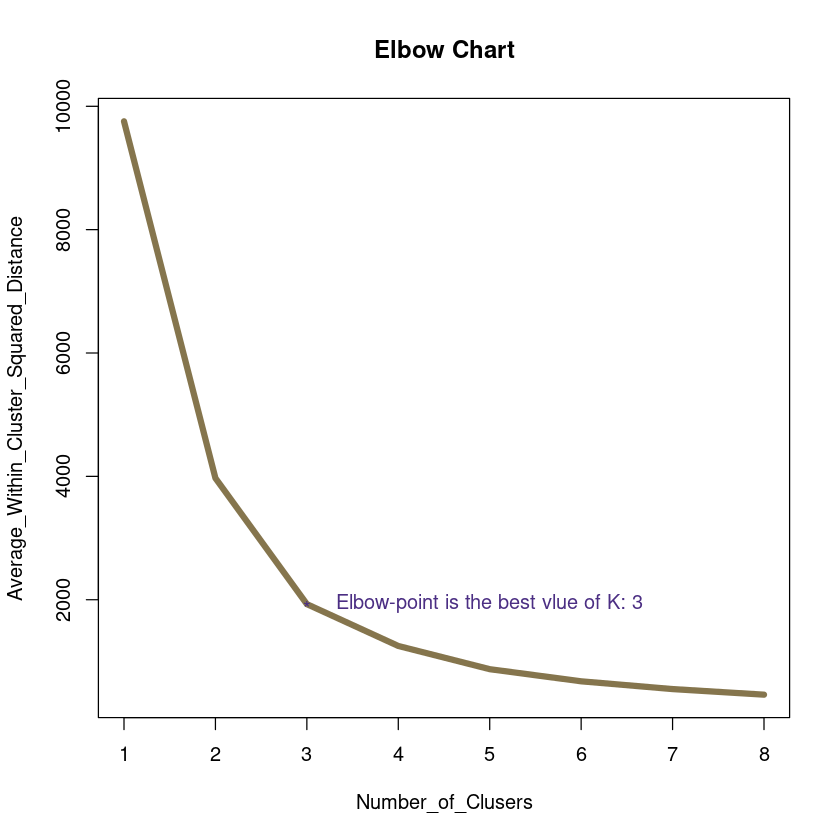

In [822]:
# Plot the elbow chart to select best value for k
Number_of_Clusers <- c(1,2,3,4,5,6,7,8)
Average_Within_Cluster_Squared_Distance <- c(avg1, avg2, avg3,avg4,avg5,avg6,avg7, avg8)
plot(Number_of_Clusers,Average_Within_Cluster_Squared_Distance,type="l", col = "#85754d", lwd=5, main="Elbow Chart")
# Elbow-point is the best vlue of K: 2
text(5, 1937,
     "Elbow-point is the best vlue of K: 3",col = "#4b2e83")
text(3,1937, "*",col= "#4b2e83", font = 80)

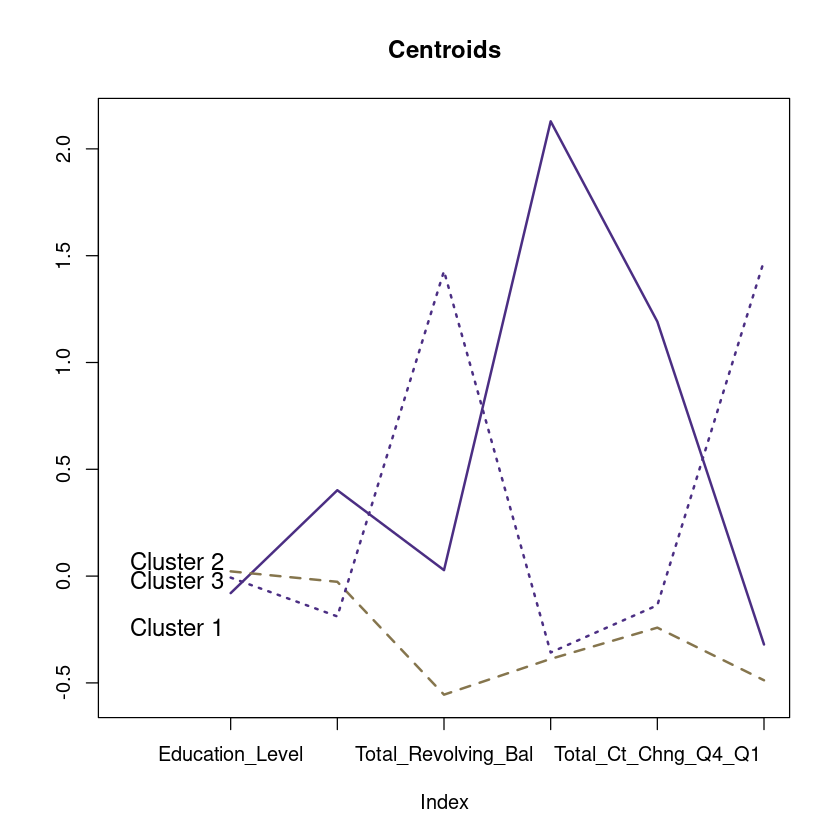

In [823]:
# Interpret the resulting clusters
# Profiling centroids
pp <- plot(c(0), xaxt = 'n', ylab = "", type = "l", 
     ylim = c(min(km$centers), max(km$centers)), xlim = c(0, 6), main="Centroids")

# label x-axes
axis(1, at = c(1:6), labels = names(attrition))

# plot centroids
for (i in c(1:3))
  lines(km$centers[i,], lty = i, lwd = 2, col = ifelse(i %in% c(1,3),
                                                       "#4b2e83" , "#85754d"))

# name clusters
text(x = 0.5, y = km$centers[, 1]*3, cex= 1.2,labels = paste("Cluster", c(1:3)))

In [824]:
#PVisualizing clusters in two dimensions 
install.packages("factoextra")
library(factoextra)


Installing factoextra [1.0.7] ...
	OK [linked cache]


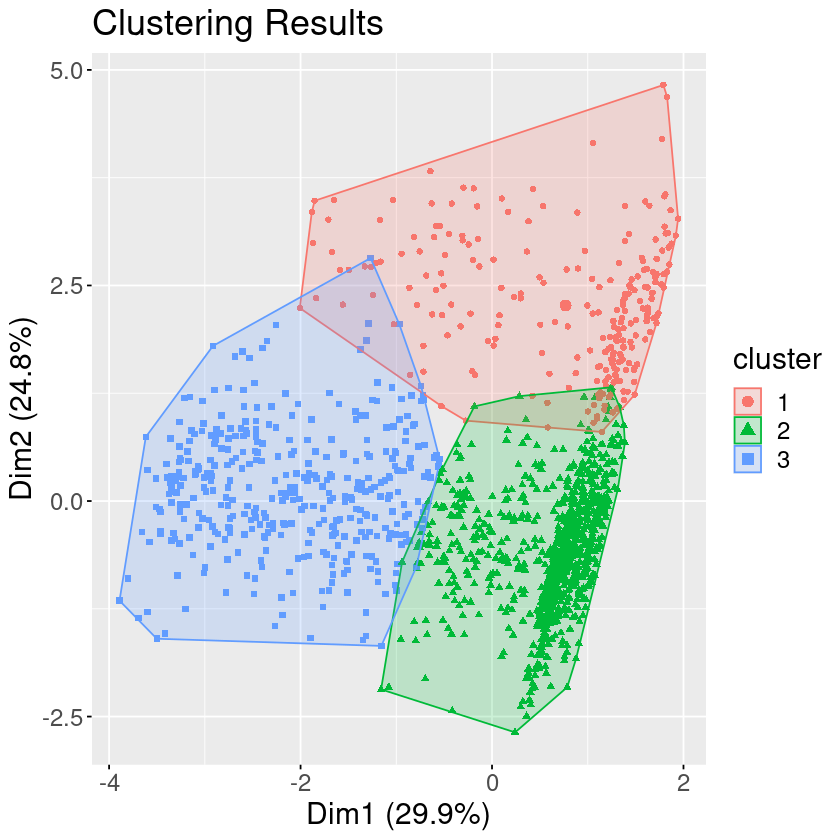

In [825]:
fv <- fviz_cluster(km, geom = "point", data = attrition) + ggtitle("Clustering Results")
fv + theme(text = element_text(size = 18)) 

### Insights from Clustering:
After we selected the XGBoost model to predict which customers would churn in the future, we wanted to dive deeper into the attrited customer group (16%). We ran the unsupervised learning model K-means to segment customers.
Using an elbow chart, we selected 3 as the best value of K (number of clusters).
The resulting clusters allowed us to identify some characteristics of each. 
- Cluster 1 as “High Value”, containing customers with high income and recently decreasing transaction activities.
- Cluster 2, as “Potential Value”, had customers of medium income level and low engagement. 
- Cluster 3, as "Risky", contained individuals with low income and high revolving balances.


## Text Mining for Customer Reviews
###  Import Data and Build a Corpus
- Build a corpus containing all the docs. The main structure for managing documents in tm is a so-called Corpus, representing a collection of text documents. VectorSource(x) interprets each element of the vector x as a document.
- Another useful way to build a corpus is using ZipSource(x). A ZIP file source extracts a compressed ZIP file via unzip and interprets each file as a document. An example usage can be corp <- Corpus(ZipSource("myfiles.zip", recursive = T)).

In [826]:
# Text Ming Part
# read reveiw data:
review <- read.csv("data/card_review.csv")

In [827]:
summary(review)

  Card.Name           Category         Date.Reviewed        Profiles        
 Length:7513        Length:7513        Length:7513        Length:7513       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   Ratings            Reviews             Source           Bank.Name        
 Length:7513        Length:7513        Length:7513        Length:7513       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   Old.New         
 Length:7513       
 Class :character  
 Mode  :character  

In [828]:
str(review)

'data.frame':	7513 obs. of  9 variables:
 $ Card.Name    : chr  "RBL Platinum Delight" "AXIS VISTARA" "HDFC JET PRIVILEGE" "SBI AIR INDIA SIGNATURE" ...
 $ Category     : chr  "Rewards" "Travel" "Travel" "Travel" ...
 $ Date.Reviewed: chr  " Apr 02, 2019" " Apr 03, 2019" " Apr 03, 2019" " Apr 03, 2019" ...
 $ Profiles     : chr  "User" "User" "User" "User" ...
 $ Ratings      : chr  "5" "4" "5" "4" ...
 $ Reviews      : chr  "I have been using RBL PLATINUM card since 2017. I am getting buy one get one movie tickets free from BOOK MY SH"| __truncated__ "I have just started using AXIS BANK VISTARA CREDIT CARD and the features are good. The credit limit was average"| __truncated__ "I have taken SBI JET PRIVILEGE CARD this is life time free card .Credit limit is sufficient  and good.Customer "| __truncated__ "I have Air India Signature card and its been 2 months. The credit limit is more than 50K which was okay. They a"| __truncated__ ...
 $ Source       : chr  "BANK BAAZAR" "BANK BAAZAR" 

In [829]:
head(review)

,Card.Name,Category,Date.Reviewed,Profiles,Ratings,Reviews,Source,Bank.Name,Old.New
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,RBL Platinum Delight,Rewards,"Apr 02, 2019",User,5,I have been using RBL PLATINUM card since 2017. I am getting buy one get one movie tickets free from BOOK MY SHOW every month. Credit limit is not sufficient if they increase the limit it will be good. Annual charges is there but i am not sure.Customer service is good.,BANK BAAZAR,RBL,New
2,AXIS VISTARA,Travel,"Apr 03, 2019",User,4,I have just started using AXIS BANK VISTARA CREDIT CARD and the features are good. The credit limit was average. They did the process on time and delivered the card within a week. The annual charge is applicable and its 1500 rupees. The documents are submitted online and also executive came for verification.,BANK BAAZAR,Axis Bank,Old
3,HDFC JET PRIVILEGE,Travel,"Apr 03, 2019",User,5,I have taken SBI JET PRIVILEGE CARD this is life time free card .Credit limit is sufficient and good.Customer service is also good. Flights tickets bookings and all i am getting some rewards. I am getting some lounge benefits. I am using this card since 2014.,BANK BAAZAR,HDFC Bank,Old
4,SBI AIR INDIA SIGNATURE,Travel,"Apr 03, 2019",User,4,I have Air India Signature card and its been 2 months. The credit limit is more than 50K which was okay. They are charging annual fee of Rs.1500. I have taken the card for flight ticket booking and it has air lounge access. The customer service is good.,BANK BAAZAR,SBI,Old
5,CITIBANK PREMIERMILES,Travel,"Apr 03, 2019",User,4,"I hold CITI bank PREMIERMILES CARD recently,They have charged me annual fee in this card,but no waived off option available in this card,and i am happy with the credit limit which they have given me in this card,and the reason for choosing mainly this bank is for their brand as they have good brand name.",BANK BAAZAR,Citi Bank,Old
6,CITIBANK PREMIERMILES,Travel,"Apr 03, 2019",User,4,The card which i have taken is CITI PREMIERMILES CARD this is one of the best travel program in the market. Annual charges for this card is Rs. 3000 there is no fees wavier. Customer services and responsiveness is really good. I am getting more reward points for this card.I Received the card with in 4 days.Documentation is also very easy process executive come and collected the documents.,BANK BAAZAR,Citi Bank,Old


In [830]:
review$Ratings[review$Ratings == "0"] <- "Bad"
review$Ratings[review$Ratings == "0.5" ] <- "Bad"
review$Ratings[review$Ratings == 1] <- "Bad"
review$Ratings[review$Ratings == 2] <- "Bad"
review$Ratings[review$Ratings == "2.5"] <- "Bad"
review$Ratings[review$Ratings == "3"] <- "Bad"
review$Ratings[review$Ratings == "3.5"] <- "Bad"
review$Ratings[review$Ratings == "4"] <- "Good"
review$Ratings[review$Ratings == "4.5"] <- "Good"
review$Ratings[review$Ratings == "5"] <- "Good"
review$Ratings[review$Ratings == "None"] <- "Unknown"

In [831]:
str(review)

'data.frame':	7513 obs. of  9 variables:
 $ Card.Name    : chr  "RBL Platinum Delight" "AXIS VISTARA" "HDFC JET PRIVILEGE" "SBI AIR INDIA SIGNATURE" ...
 $ Category     : chr  "Rewards" "Travel" "Travel" "Travel" ...
 $ Date.Reviewed: chr  " Apr 02, 2019" " Apr 03, 2019" " Apr 03, 2019" " Apr 03, 2019" ...
 $ Profiles     : chr  "User" "User" "User" "User" ...
 $ Ratings      : chr  "Good" "Good" "Good" "Good" ...
 $ Reviews      : chr  "I have been using RBL PLATINUM card since 2017. I am getting buy one get one movie tickets free from BOOK MY SH"| __truncated__ "I have just started using AXIS BANK VISTARA CREDIT CARD and the features are good. The credit limit was average"| __truncated__ "I have taken SBI JET PRIVILEGE CARD this is life time free card .Credit limit is sufficient  and good.Customer "| __truncated__ "I have Air India Signature card and its been 2 months. The credit limit is more than 50K which was okay. They a"| __truncated__ ...
 $ Source       : chr  "BANK BAAZAR" "B

In [832]:
head(review)

,Card.Name,Category,Date.Reviewed,Profiles,Ratings,Reviews,Source,Bank.Name,Old.New
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,RBL Platinum Delight,Rewards,"Apr 02, 2019",User,Good,I have been using RBL PLATINUM card since 2017. I am getting buy one get one movie tickets free from BOOK MY SHOW every month. Credit limit is not sufficient if they increase the limit it will be good. Annual charges is there but i am not sure.Customer service is good.,BANK BAAZAR,RBL,New
2,AXIS VISTARA,Travel,"Apr 03, 2019",User,Good,I have just started using AXIS BANK VISTARA CREDIT CARD and the features are good. The credit limit was average. They did the process on time and delivered the card within a week. The annual charge is applicable and its 1500 rupees. The documents are submitted online and also executive came for verification.,BANK BAAZAR,Axis Bank,Old
3,HDFC JET PRIVILEGE,Travel,"Apr 03, 2019",User,Good,I have taken SBI JET PRIVILEGE CARD this is life time free card .Credit limit is sufficient and good.Customer service is also good. Flights tickets bookings and all i am getting some rewards. I am getting some lounge benefits. I am using this card since 2014.,BANK BAAZAR,HDFC Bank,Old
4,SBI AIR INDIA SIGNATURE,Travel,"Apr 03, 2019",User,Good,I have Air India Signature card and its been 2 months. The credit limit is more than 50K which was okay. They are charging annual fee of Rs.1500. I have taken the card for flight ticket booking and it has air lounge access. The customer service is good.,BANK BAAZAR,SBI,Old
5,CITIBANK PREMIERMILES,Travel,"Apr 03, 2019",User,Good,"I hold CITI bank PREMIERMILES CARD recently,They have charged me annual fee in this card,but no waived off option available in this card,and i am happy with the credit limit which they have given me in this card,and the reason for choosing mainly this bank is for their brand as they have good brand name.",BANK BAAZAR,Citi Bank,Old
6,CITIBANK PREMIERMILES,Travel,"Apr 03, 2019",User,Good,The card which i have taken is CITI PREMIERMILES CARD this is one of the best travel program in the market. Annual charges for this card is Rs. 3000 there is no fees wavier. Customer services and responsiveness is really good. I am getting more reward points for this card.I Received the card with in 4 days.Documentation is also very easy process executive come and collected the documents.,BANK BAAZAR,Citi Bank,Old


In [833]:
goodreview <- review[review$Ratings == "Good",]
badreview <- review[review$Ratings == "Bad",]

str(goodreview)


'data.frame':	880 obs. of  9 variables:
 $ Card.Name    : chr  "RBL Platinum Delight" "AXIS VISTARA" "HDFC JET PRIVILEGE" "SBI AIR INDIA SIGNATURE" ...
 $ Category     : chr  "Rewards" "Travel" "Travel" "Travel" ...
 $ Date.Reviewed: chr  " Apr 02, 2019" " Apr 03, 2019" " Apr 03, 2019" " Apr 03, 2019" ...
 $ Profiles     : chr  "User" "User" "User" "User" ...
 $ Ratings      : chr  "Good" "Good" "Good" "Good" ...
 $ Reviews      : chr  "I have been using RBL PLATINUM card since 2017. I am getting buy one get one movie tickets free from BOOK MY SH"| __truncated__ "I have just started using AXIS BANK VISTARA CREDIT CARD and the features are good. The credit limit was average"| __truncated__ "I have taken SBI JET PRIVILEGE CARD this is life time free card .Credit limit is sufficient  and good.Customer "| __truncated__ "I have Air India Signature card and its been 2 months. The credit limit is more than 50K which was okay. They a"| __truncated__ ...
 $ Source       : chr  "BANK BAAZAR" "BA

In [834]:
str(badreview)

'data.frame':	736 obs. of  9 variables:
 $ Card.Name    : chr  "HDFC JET PRIVILEGE" "AXIS VISTARA" "AXIS VISTARA SIGNATURE" "HDFC DINERS CLUB BLACK" ...
 $ Category     : chr  "Travel" "Travel" "Travel" "Lifestyle" ...
 $ Date.Reviewed: chr  " Apr 05, 2017" " Apr 09, 2019" " Apr 13, 2018" " Apr 30, 2019" ...
 $ Profiles     : chr  "User" "User" "User" "User" ...
 $ Ratings      : chr  "Bad" "Bad" "Bad" "Bad" ...
 $ Reviews      : chr  "Hdfc bank need to improve on their response. Well, I get good credit limit with this card. I also get the rewar"| __truncated__ "I have taken a AXIS BANK VISTARA SIGNATURE CREDIT CARD. Annual charges for this card is Rs. 3000,i am not sure "| __truncated__ "I hold a credit card with Axis Bank. The process was fine and the team was on time to reach out and I got the c"| __truncated__ "I have Hdfc  Bank Credit card ,The credit liit  was good ,The credit card received  on time .I am ,using this c"| __truncated__ ...
 $ Source       : chr  "BANK BAAZAR" "BAN

In [835]:
# install.packages("tm")
install.packages("tm")

Installing tm [0.7-9] ...
	OK [linked cache]


In [836]:
# load library(tm) for NLP
library(tm)

In [837]:
# convert "Reviews"column into a corpus
corp <- Corpus(VectorSource(review$Reviews))
corpgood <- Corpus(VectorSource(goodreview$Reviews))
corpbad <- Corpus(VectorSource(badreview$Reviews))

### Clean and Pre-process the Text Data
Once we have a corpus we typically want to modify the documents in it, e.g., stemming, stopword removal. Pre-processing are done via the tm_map() function which applies (maps) a function to all documents of the corpus.

In [838]:
#Clean and pre-process the text data
# 1. Switch to lower case
corp <- tm_map(corp, tolower)
corpgood <- tm_map(corpgood, tolower)
corpbad <- tm_map(corpbad, tolower)
# 2. Remove numbers 
corp <- tm_map(corp, removeNumbers)
corpgood <- tm_map(corpgood, removeNumbers)
corpbad <- tm_map(corpbad, removeNumbers)

# 3. Remove punctuation marks
corp <- tm_map(corp, removePunctuation)
corpgood <- tm_map(corpgood, removePunctuation) 
corpbad <- tm_map(corpbad, removePunctuation) 


# 4. Remove stopwords
# These  include words such as articles (a, an, the), conjunctions (and, or but etc.), common verbs (is), qualifiers (yet, however etc) . The tm package includes  a standard list of such stop words 
# examine the list of stopwords by typing in:
# stopwords("english")
corp <- tm_map(corp, removeWords, stopwords("english"))
corpgood <- tm_map(corpgood, removeWords, stopwords("english"))
corpbad <- tm_map(corpbad, removeWords, stopwords("english"))

# 5. remove "Mojibake" words
corp <- tm_map(corp, removeWords, c('â€™','â€œ','ðŸ™','â€','sbi')) # need to be improved. 
corpgood <- tm_map(corpgood, removeWords, c('â€™','â€œ','ðŸ™','â€','sbi'))
corpbad <- tm_map(corpbad, removeWords, c('â€™','â€œ','ðŸ™','â€','sbi'))

# 6. Remove extra whitespaces
corp <- tm_map(corp, stripWhitespace) 
corpgood <- tm_map(corpgood, stripWhitespace) 
corpbad <- tm_map(corpbad, stripWhitespace) 


Warning message in tm_map.SimpleCorpus(corp, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpgood, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpbad, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpgood, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpbad, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpgood, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpbad, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map

### Stemming
Another important preprocessing step is to make a text stemming which reduces words to their root form. In other words, this process removes suffixes from words to make it simple and to get the common origin. Examples:

cats -> cat
travel, traveling, traveled -> travel
We will next use an R package SnowballC (Snowball stemmers based on the C libstemmer UTF-8 library) to collapse words to a common root to aid comparison of vocabulary.

In [839]:
install.packages("SnowballC")

Installing SnowballC [0.7.0] ...
	OK [linked cache]


In [840]:
library(SnowballC)
corp <- tm_map(corp, stemDocument)
corpgood <- tm_map(corpgood, stemDocument)
corpbad <- tm_map(corpbad, stemDocument)


Warning message in tm_map.SimpleCorpus(corp, stemDocument):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpgood, stemDocument):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpbad, stemDocument):
“transformation drops documents”


### Generate the Spreadsheet Representation of the Documents
Columns are terms (words)
Rows are documents
Each cell can represent presence, term frequency, or, IDF weighted term frequency (TF-IDF)
Basic definition:

Term Frequency TF(t,d): The number of times a term (word) t appears in each document d.
Inverse Document Frequency (IDF):
IDF(t)=log(total number of documents# documents containing term t)
IDF accounts for terms that appear frequently in all the documents.
TF-IDF matrix:
TF-IDF(t,d)=TF(t,d)×IDF(t)

In [841]:
# find out Term-Document matirx based on Term Frequency
dtm <- DocumentTermMatrix(corp)
dtm_good <- DocumentTermMatrix(corpgood)
dtm_bad <- DocumentTermMatrix(corpbad)
inspect(dtm)

<<DocumentTermMatrix (documents: 7513, terms: 9704)>>
Non-/sparse entries: 179028/72727124
Sparsity           : 100%
Maximal term length: 70
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   bank can card credit get limit offer point use will
  1122   31  20   58     50   8     6     3     1   3   13
  1124   31  20   58     50   8     6     3     1   3   13
  553     1   1   20      7   7     4     2     2   5    0
  566    14   6    6      0   3     0     0     0   1    5
  570    13   6   47     10   7     5     3     4   7    3
  574     0   1   12      7   2     4     1     0   5    5
  599    20   8    9      5   1     0     0     0   1    4
  619     2   1   18      7   8     0     5     8   0    1
  669     5   3    0      0   5     2    13     1   0    2
  676     1   1    3      0   3     0     0     6   0    0


In [842]:
# find out tf-idf
tfidf <- weightTfIdf(dtm)
tfidf_good <- weightTfIdf(dtm_good)
tfidf_bad <- weightTfIdf(dtm_bad)

inspect(tfidf)

Warning message in weightTfIdf(dtm):
“empty document(s): 241 1503 3073 3160 3916 4113 4244 4762 4786 5290 7104”


<<DocumentTermMatrix (documents: 7513, terms: 9704)>>
Non-/sparse entries: 179028/72727124
Sparsity           : 100%
Maximal term length: 70
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
      Terms
Docs   bank can card credit get limit point use will yes
  201     0   0    0      0   0     0     0   0    0   0
  2365    0   0    0      0   0     0     0   0    0   0
  2379    0   0    0      0   0     0     0   0    0   0
  3019    0   0    0      0   0     0     0   0    0   0
  4590    0   0    0      0   0     0     0   0    0   0
  4727    0   0    0      0   0     0     0   0    0   0
  5448    0   0    0      0   0     0     0   0    0   0
  61      0   0    0      0   0     0     0   0    0   0
  6904    0   0    0      0   0     0     0   0    0   0
  986     0   0    0      0   0     0     0   0    0   0


### Generate the Word Cloud
The importance of words can be illustrated as a word cloud as follow:

In [843]:
install.packages("wordcloud")

Installing wordcloud [2.6] ...
	OK [linked cache]


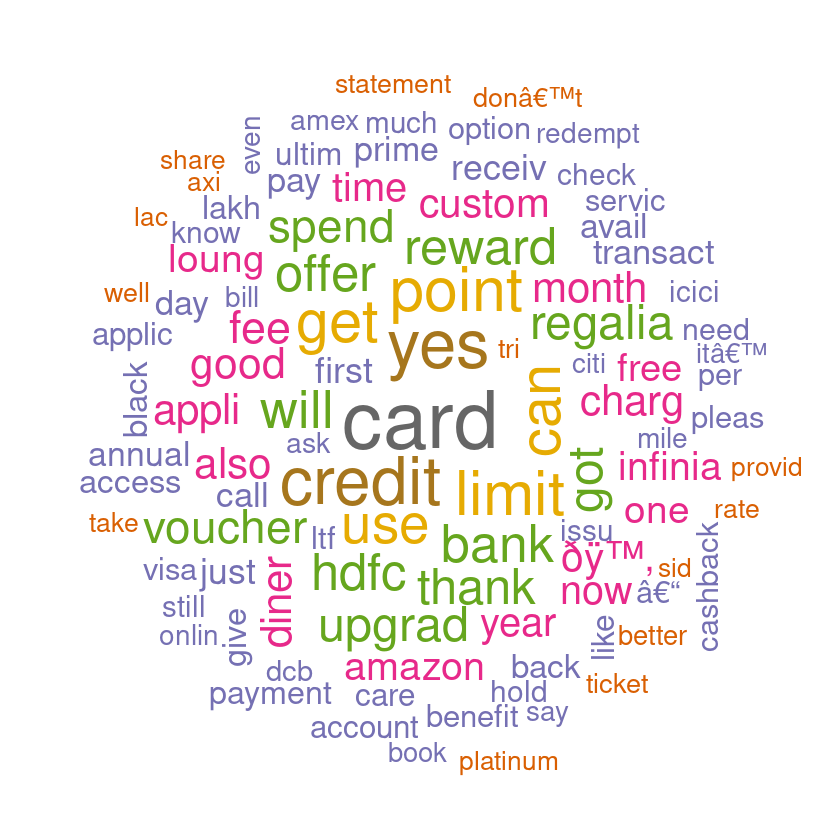

In [844]:
library(wordcloud)
# convert tfidf to a matrix
# for all reviews with rating of 0-5 or Unknown.
m <- as.matrix(tfidf)

# find out the importance of each term by summing up the tf-idf scores over the corpus
v <- sort(colSums(m),decreasing=TRUE)
wordcloud(names(v), v, random.order=FALSE, max.words=100, colors=brewer.pal(8, "Dark2"))

# brewer.pal(n, name) is used for setting the color palettes
# n: Number of different colors in the palette, minimum 3, maximum depending on palette
# name: A palette name

Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“payment could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“increas could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“respons could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“transact could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“now could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“money could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“mani could not be fit on page. It will not be plotted.”
Warning

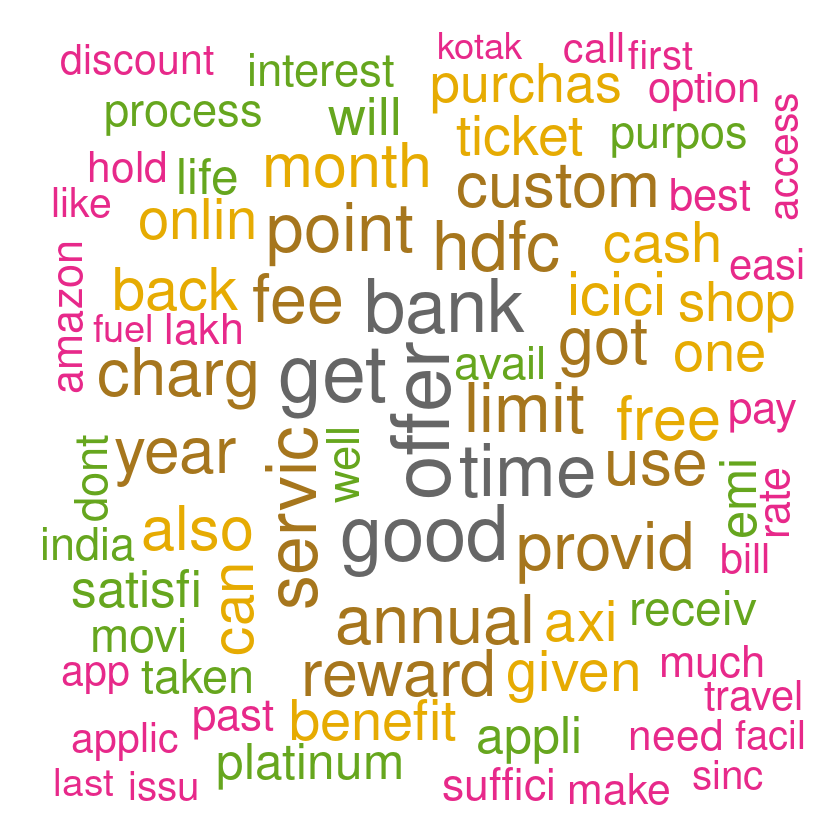

In [845]:
# Only for the reviews with rating >= 4
m_good <- as.matrix(tfidf_good) 

# find out the importance of each term by summing up the tf-idf scores over the corpus
v <- sort(colSums(m_good),decreasing=TRUE)
wordcloud(names(v), v, random.order=FALSE, max.words=100, colors=brewer.pal(8, "Dark2"))

# brewer.pal(n, name) is used for setting the color palettes
# n: Number of different colors in the palette, minimum 3, maximum depending on palette
# name: A palette name

Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“inform could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“close could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“accept could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“need could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“cancel could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“know could not be fit on page. It will not be plotted.”
Warning message in wordcloud(names(v), v, random.order = FALSE, max.words = 100, :
“request could not be fit on page. It will not be plotted.”
Warning me

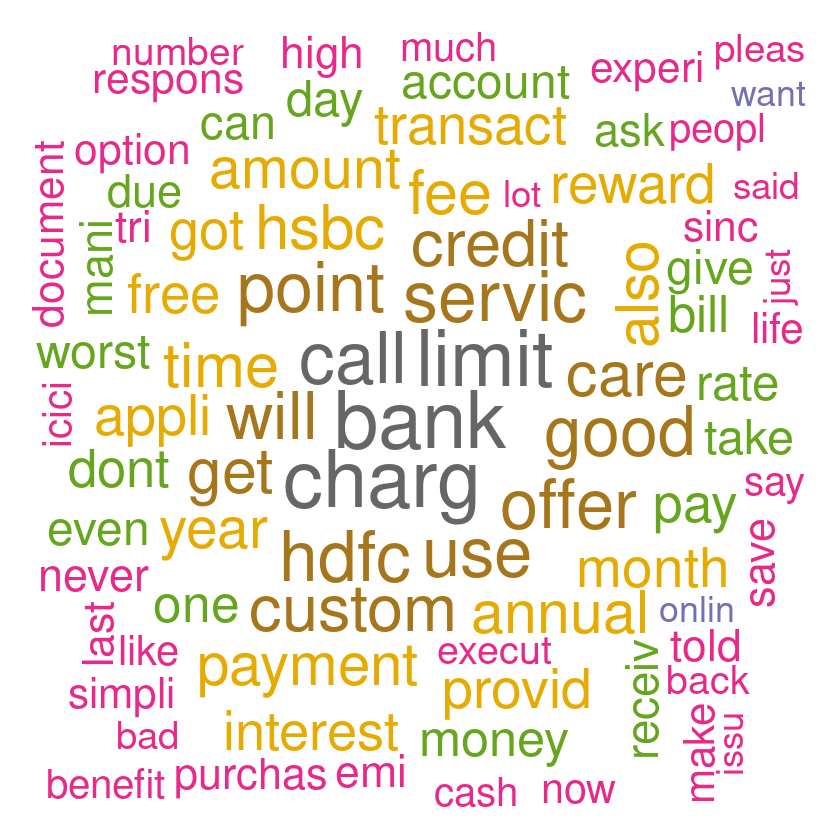

In [846]:
# Only for the reviews with rating < 4

m_bad <- as.matrix(tfidf_bad)

# find out the importance of each term by summing up the tf-idf scores over the corpus
v <- sort(colSums(m_bad),decreasing=TRUE)
wordcloud(names(v), v, random.order=FALSE, max.words=100, colors=brewer.pal(8, "Dark2"))

# brewer.pal(n, name) is used for setting the color palettes
# n: Number of different colors in the palette, minimum 3, maximum depending on palette
# name: A palette name

### Insights from Text Mining
We were interested in some qualitative aspects of credit card satisfaction and what customers care about, Using TF (Term Frequency) and IDF (Inverse Document Frequency), we were able to associate words more commonly used in positive (ratings 4.0-5.0) versus negative ratings (0.0-3.5). Word clouds were generated for each.
- We can see that satisfied credit card reviews frequently used the words “offer” and “time”, suggesting that promotional offers and timely customer service contributed to positive customer experience. 
- On the other hand, negative reviews often contained the words “charge”, “limit” and “call”, potentially suggesting that they were unsatisfied with annual charges, the available credit limit on their card, and perhaps had to call customer service in order to resolve issues.



## Conclusion

- The XGBoost classification model gave great predictive accuracy, as well as good detection of attrition and ruling out non-attrition cases. For customers that are predicted to churn, an alert could be generated to flag them as potential attrition and additional attention and service can be targeted toward them.
- From our identified clusters, we can also create different segmentation (High, Medium, and Low attention needed) and tailor customer service to their specific needs. Some potential solutions are:
   - Cluster 1: Contact customers individually to see if they have complaints, better service
   - Cluster 2: Offer incentives
   - Cluster 3: Avoid default risk, help customer manage their debts e.g. negotiate new terms 
 
   
- Some service improvement suggestions are to offer special promotions, save customer time through better call service, revising the annual fee structure, increasing credit limits, and establishing a customer loyalty campaign.


Further improvements can be made to our analyses moving forward, including tuning hyperparameters, handling imbalanced data, and trying deep-learning models.


## References

- Goyal, Sakshi. “Credit Card Customer.” Kaggle, https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers 

- Chidarala, Nagarjuna. “Credit Card Reviews.” Kaggle, https://www.kaggle.com/datasets/arjunanc/credit-card-reviews